# How to Connect Python With SQL

### 1. Importing / Installing packages

In [6]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import itertools
import warnings
warnings.filterwarnings('ignore')

# installing auto arima
# pip install --user pmdarima

### 2. Reading / Loading the Raw Data into Python

In [7]:
#################################################################################################################
##############################   Getting the file from SQL Server      ##########################################
#################################################################################################################

import pypyodbc as podbc

conn2 = podbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-8L98FK0\MSSQLSERVER09;"
                     "Database=Data360YP;"
                     "Trusted_Connection=yes;")

# rynning the SQL query i need
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[Raw_Data_GDP]''', conn2)

#conn.close()

# Viz
SQL_Query.head()

demo_ind                                 indicator location  \
0  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   
1  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   
2  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   
3  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   
4  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   

     country  time  value flag codes flags  
0  Australia  1970   2.86       None  None  
1  Australia  1971   2.96       None  None  
2  Australia  1972   2.74       None  None  
3  Australia  1973   2.49       None  None  
4  Australia  1974   2.40       None  None

### 3. Running a Simple forecast model


Australia


Australia Arima Error

Austria

Austria Arima Error

Belgium

Belgium Arima Error

Canada

Czechia
Czechia Arima Error

Denmark

Denmark Arima Error

Finland

France
France Arima Error

Germany

Germany Arima Error

Greece

Hungary
Hungary Arima Error

Iceland

Ireland
Ireland Arima Error

Italy

Japan
Republic of Korea
Republic of Korea Arima Error

Luxembourg

Mexico
Netherlands
New Zealand
New Zealand Arima Error

Norway

Poland
Poland Arima Error

Portugal

Slovakia
Afghanistan
Albania
Algeria
Angola
Angola Arima Error

Antigua and Barbuda

Argentina
Armenia
Azerbaijan
Bahamas
Bahrain
Bangladesh
Bangladesh Arima Error

Barbados

Belize
Benin
Benin Arima Error

Bhutan

Bhutan Arima Error

Bolivia (Plurinational State of)

Bolivia (Plurinational State of) Arima Error

Bosnia and Herzegovina

Botswana
Brazil
Brunei Darussalam
Bulgaria
Bulgaria Arima Error

Burkina Faso

Burkina Faso Arima Error

Burundi

Burundi Arima Error

Cambodia

Cambodia Arima Error

Cameroon

Camer

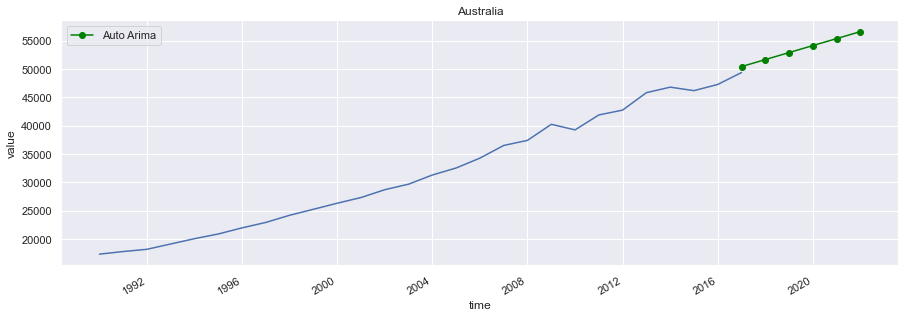

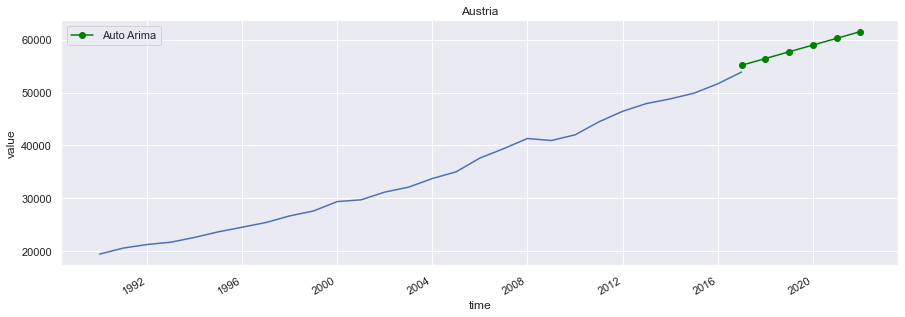

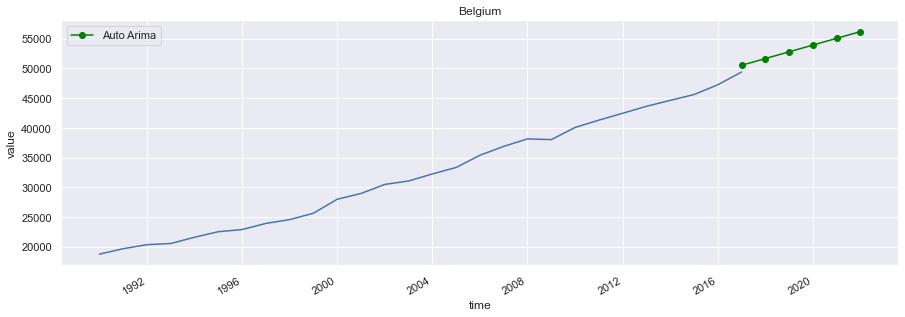

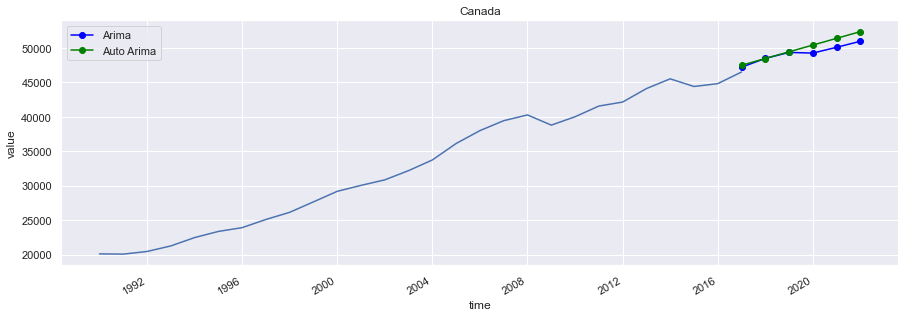

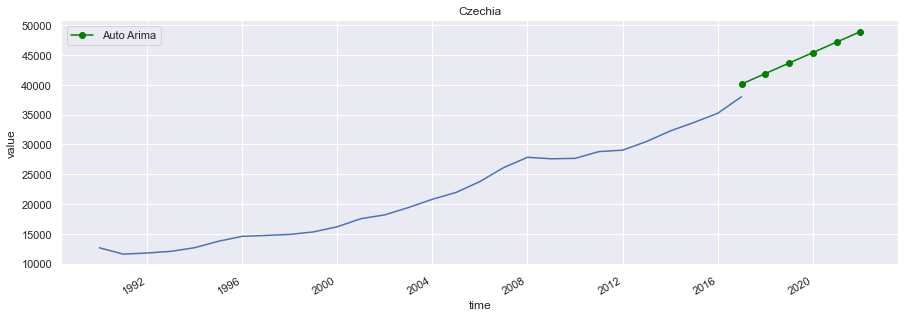

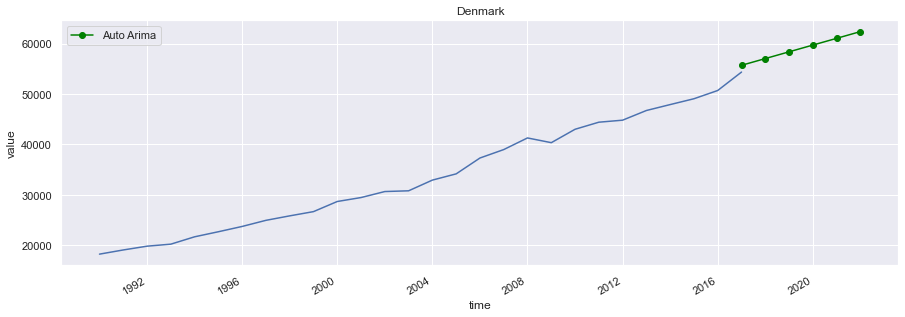

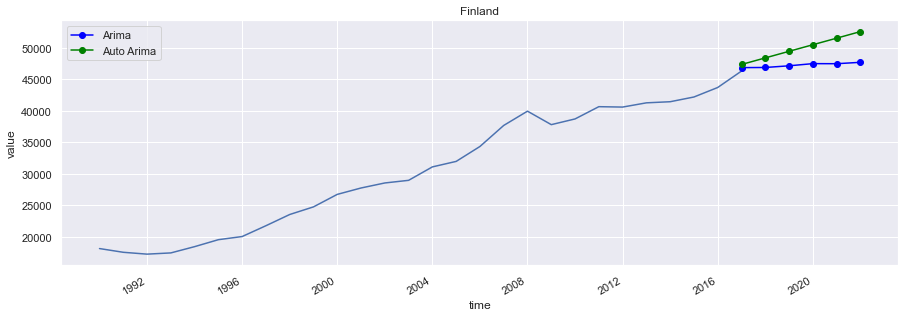

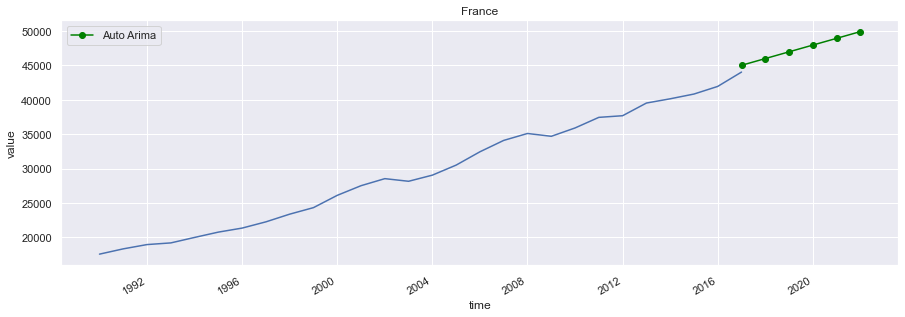

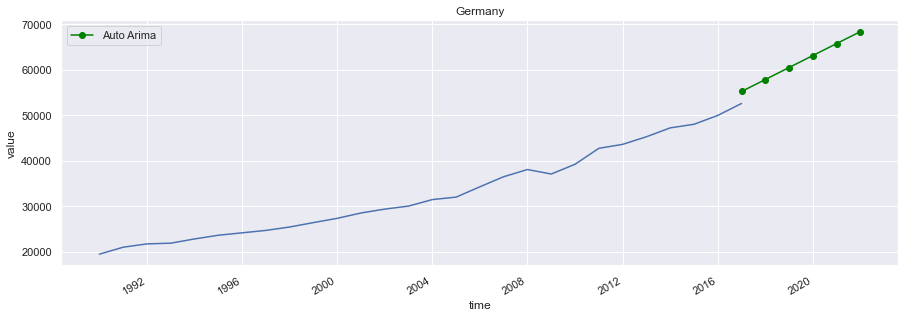

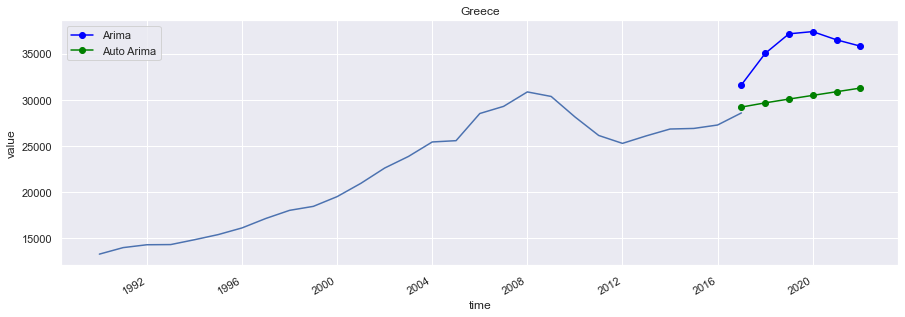

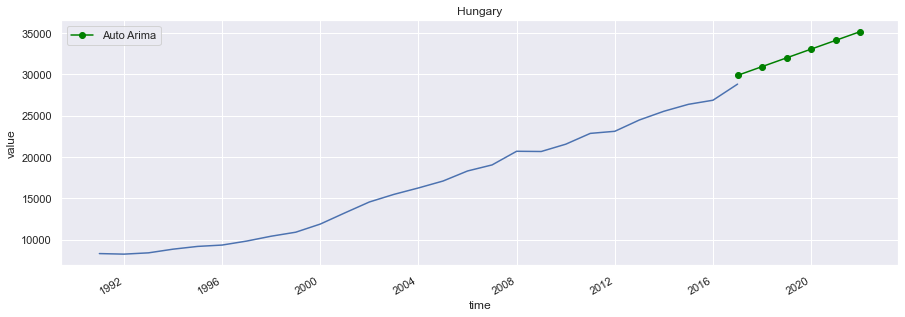

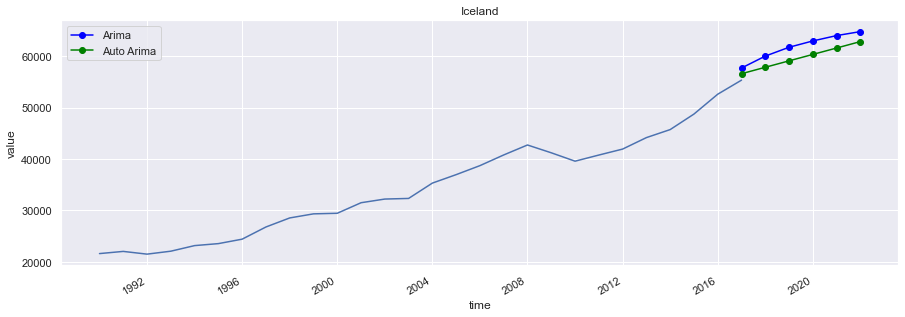

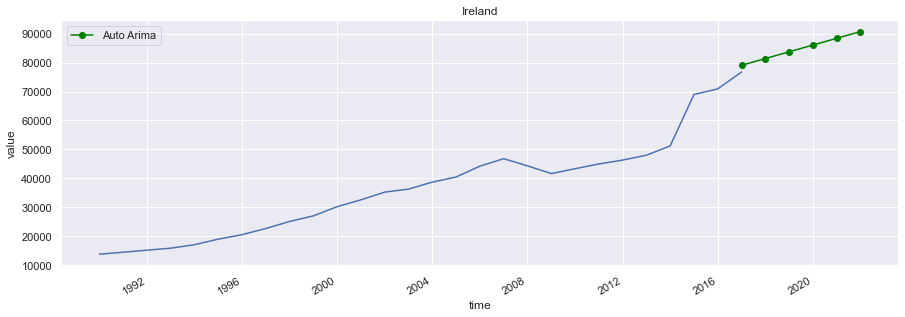

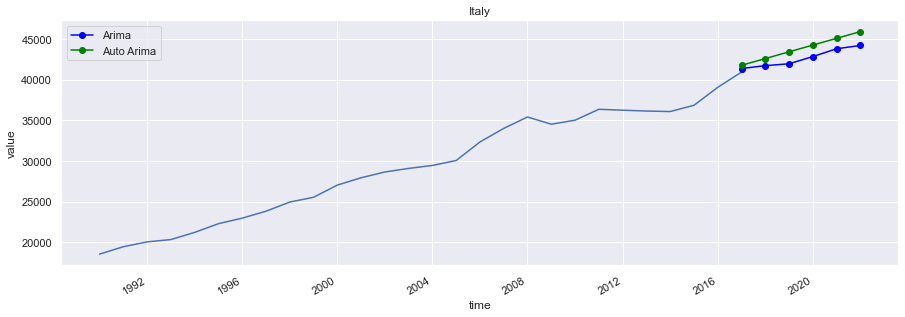

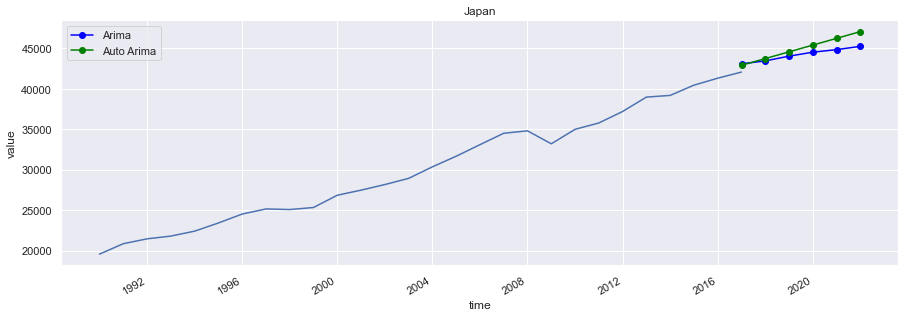

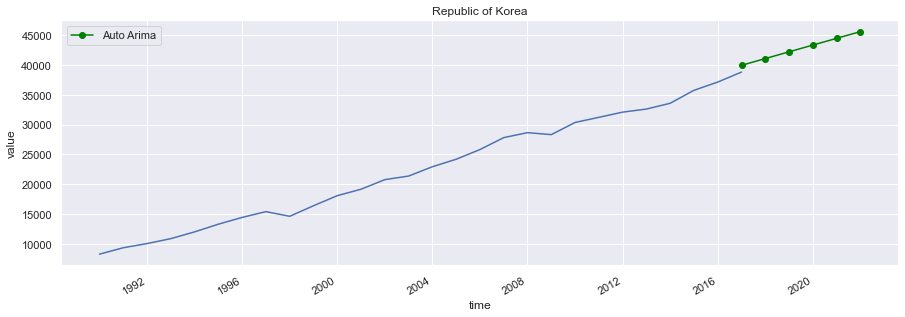

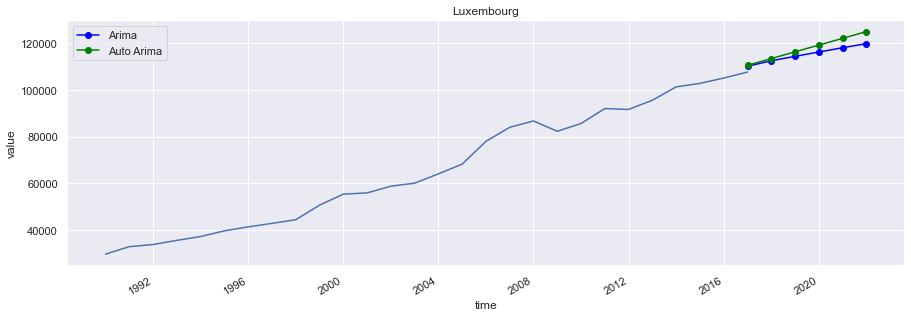

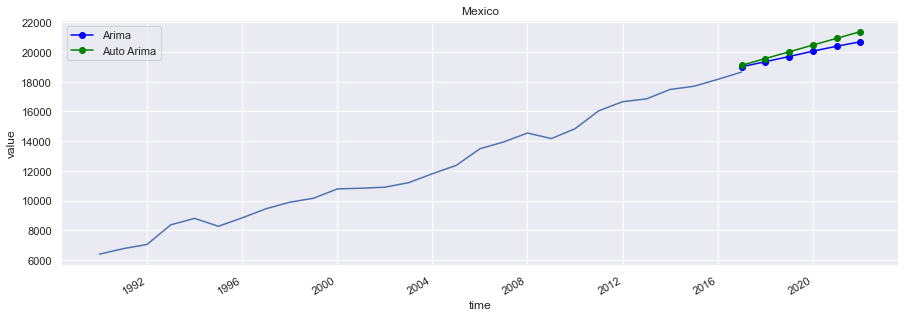

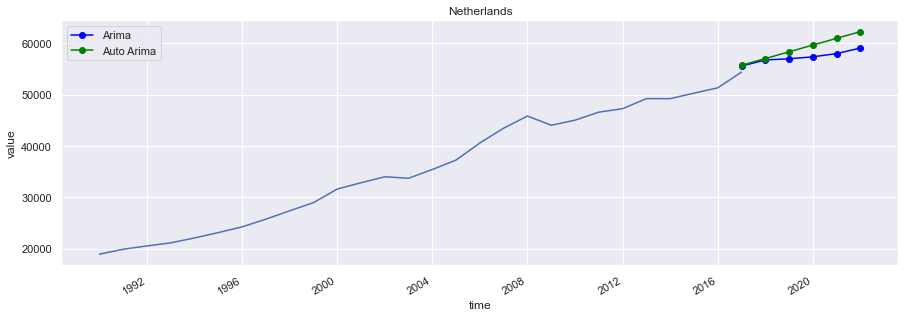

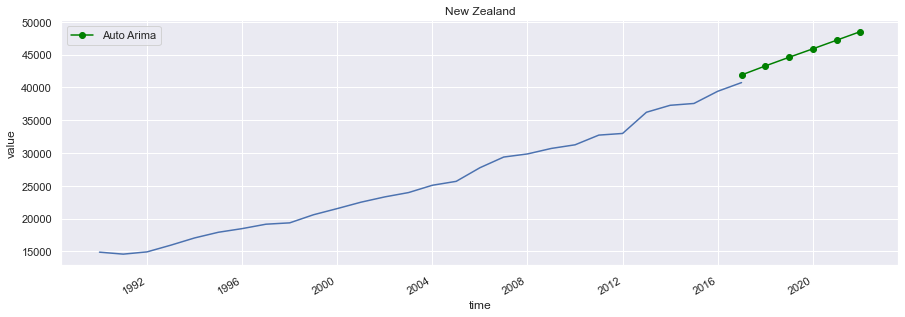

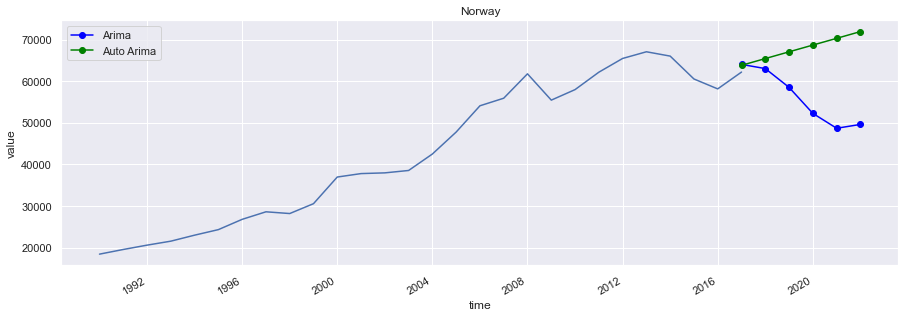

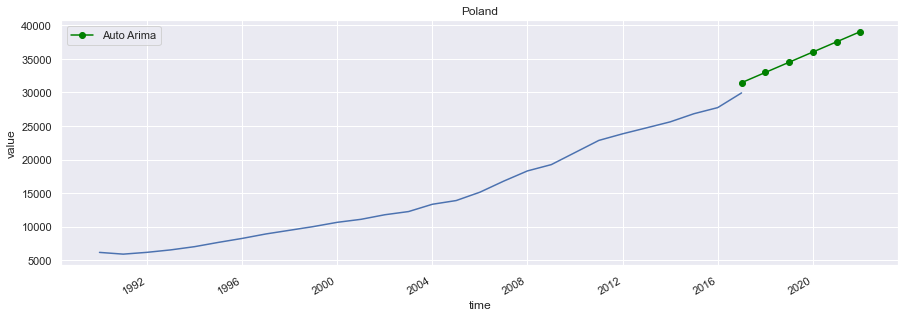

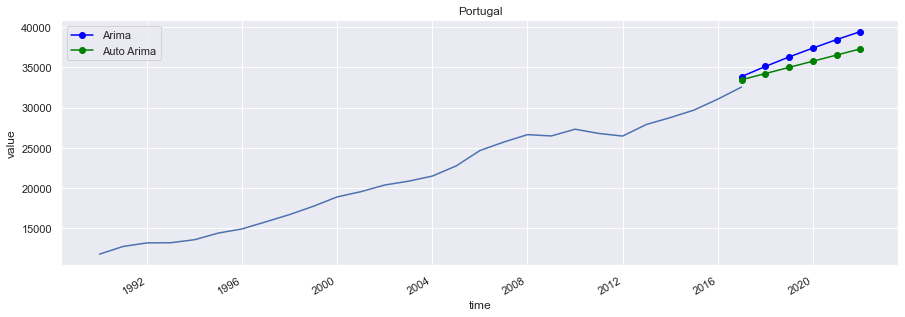

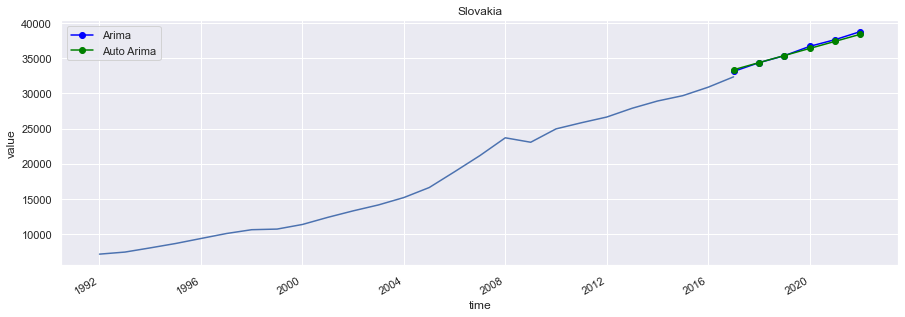

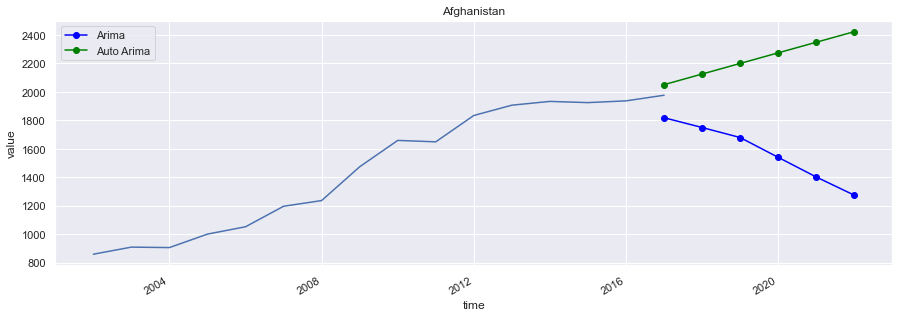

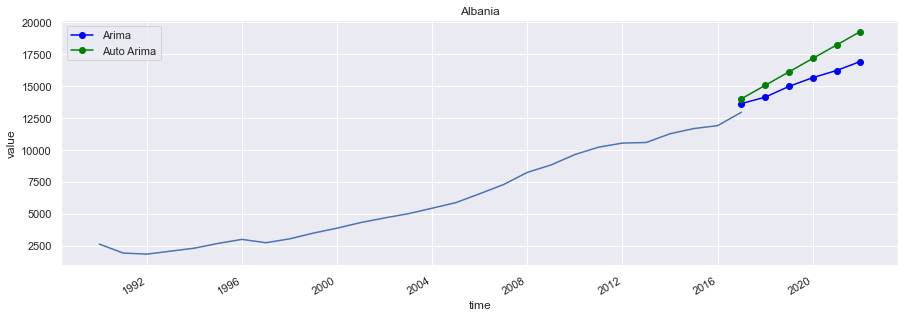

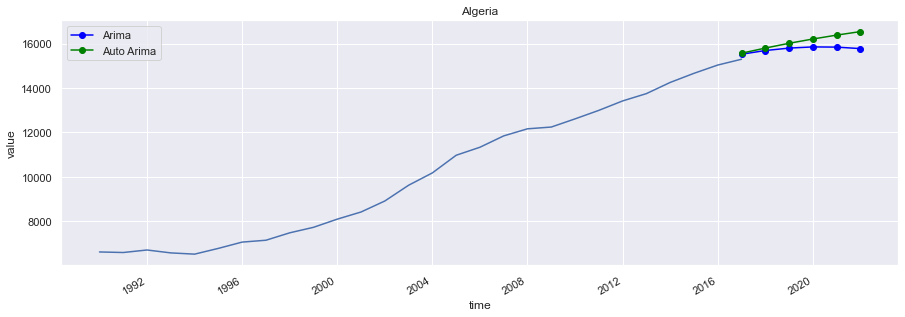

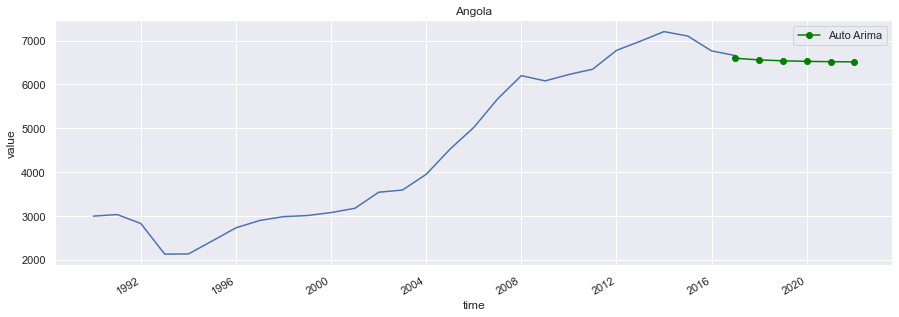

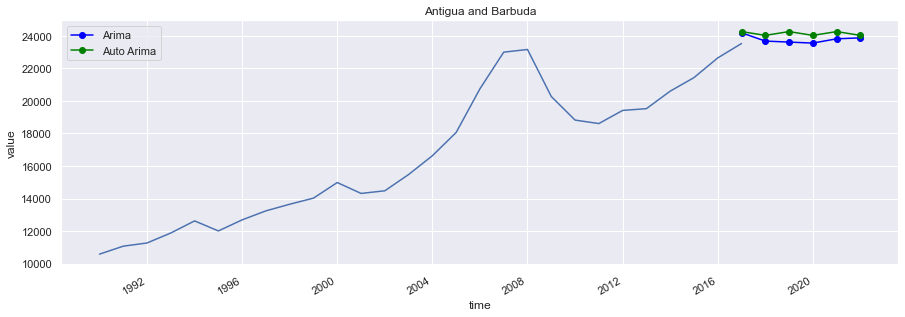

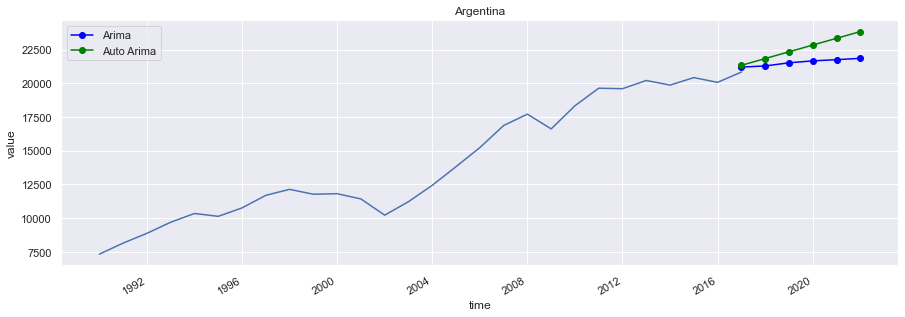

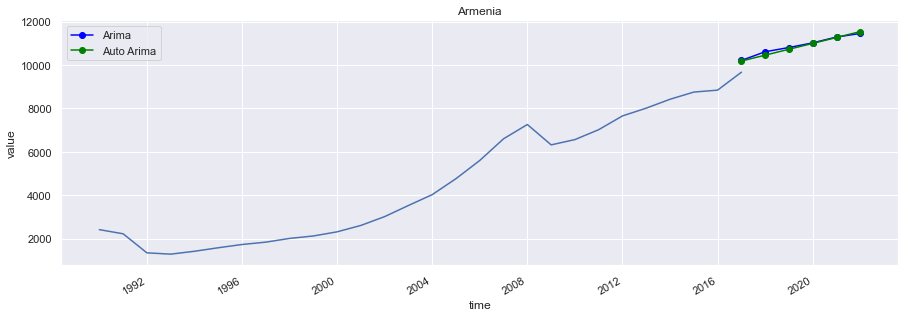

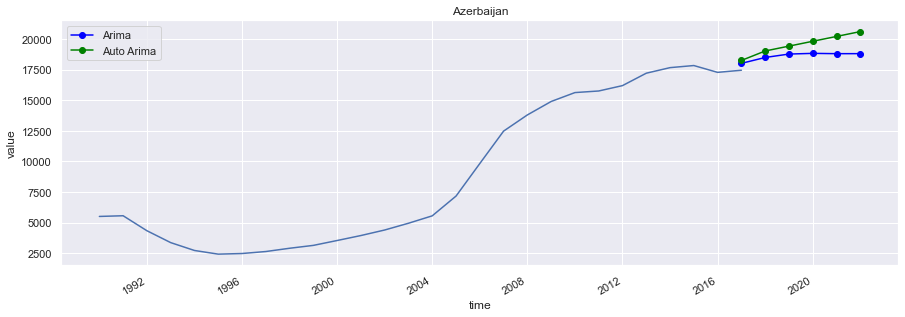

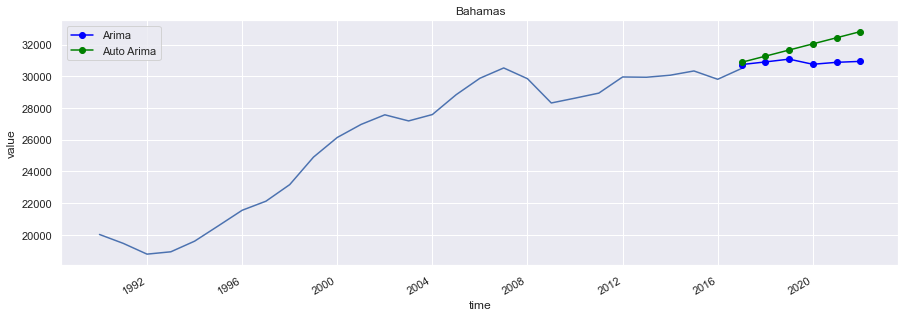

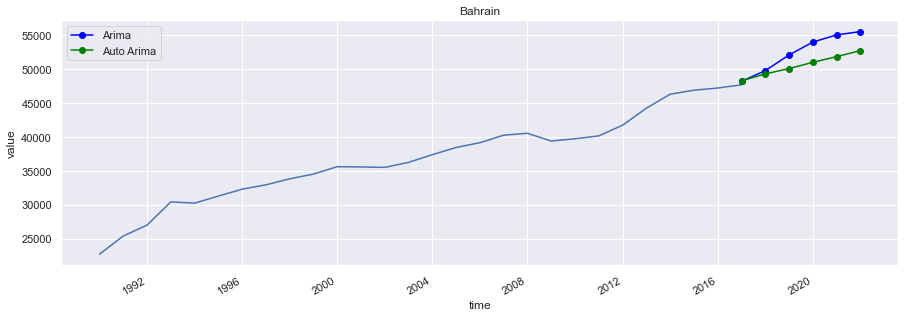

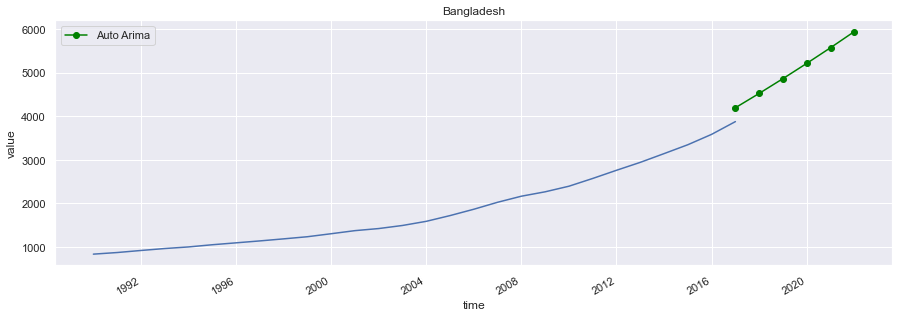

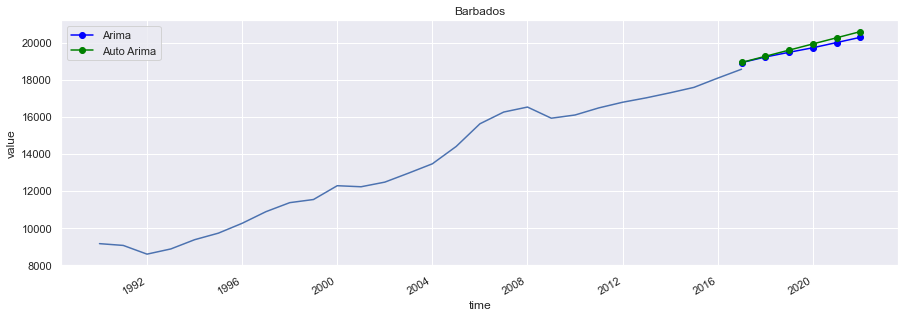

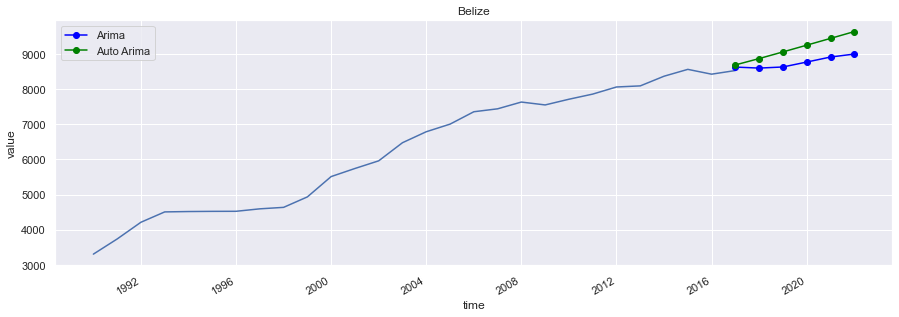

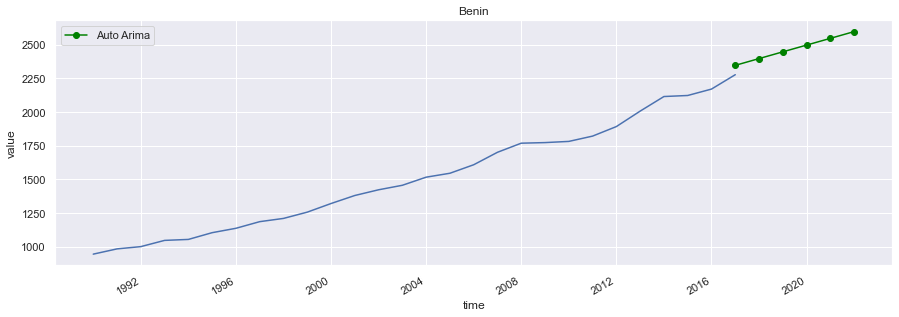

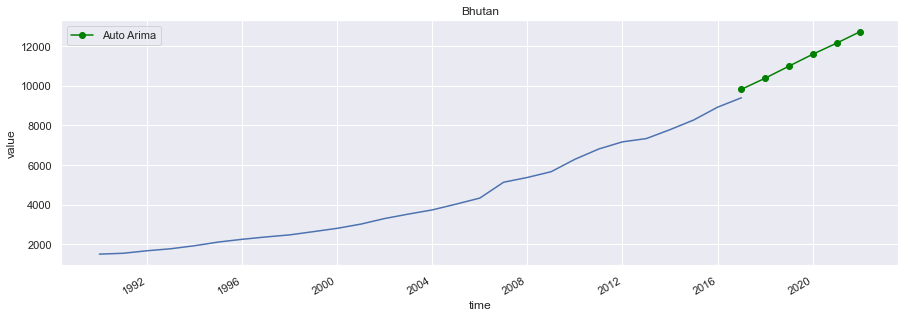

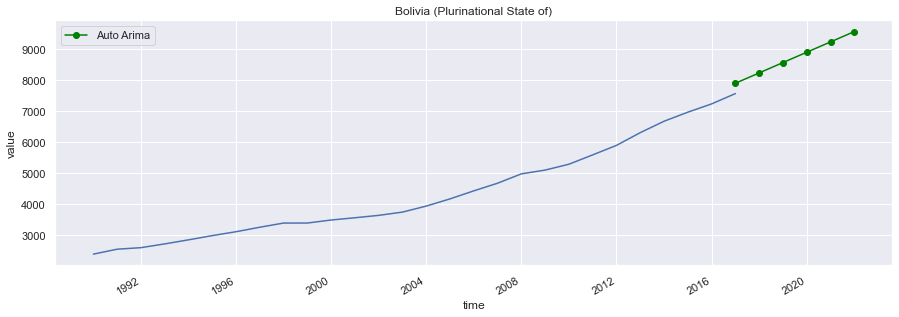

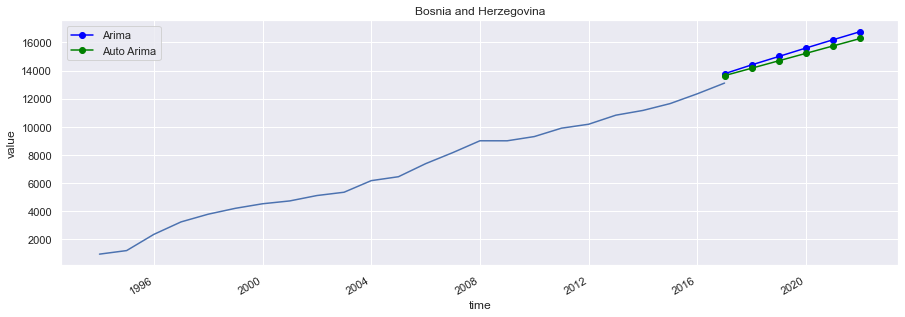

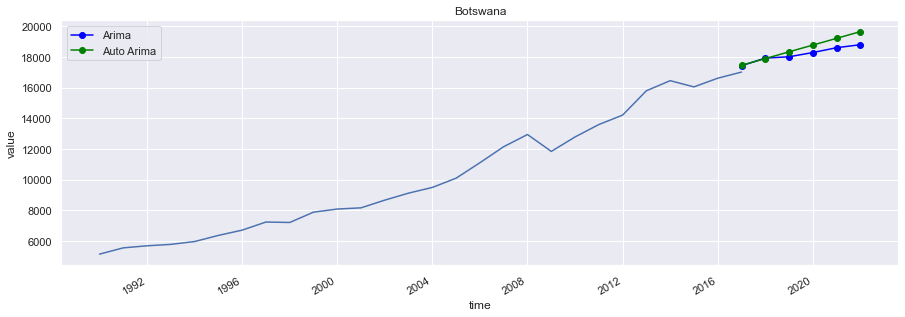

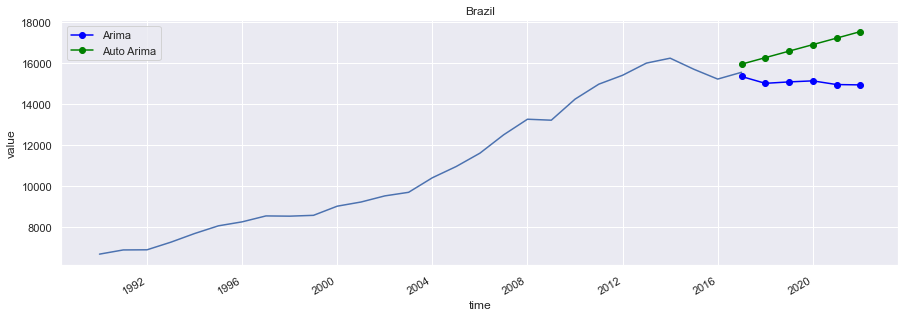

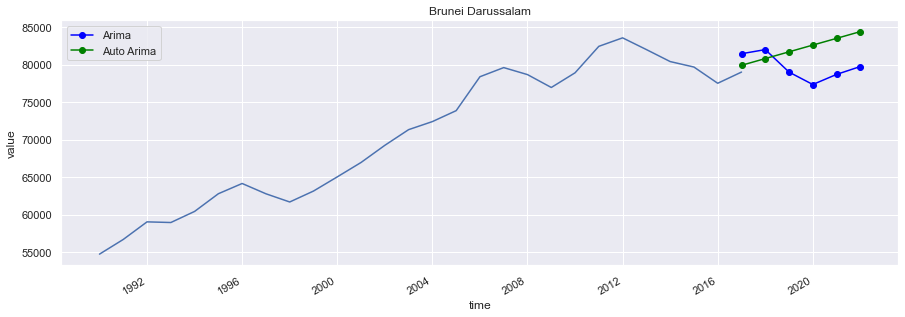

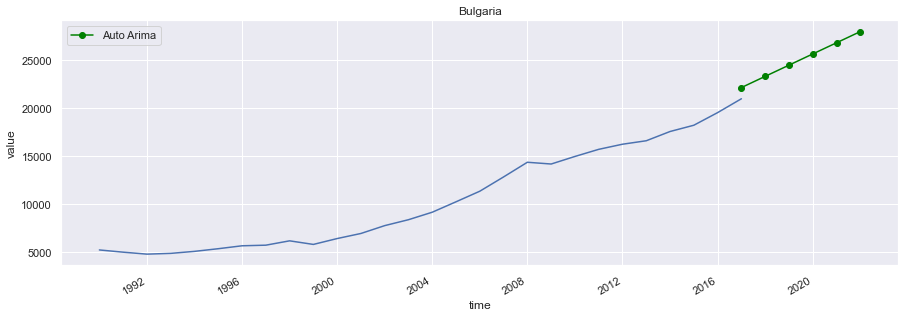

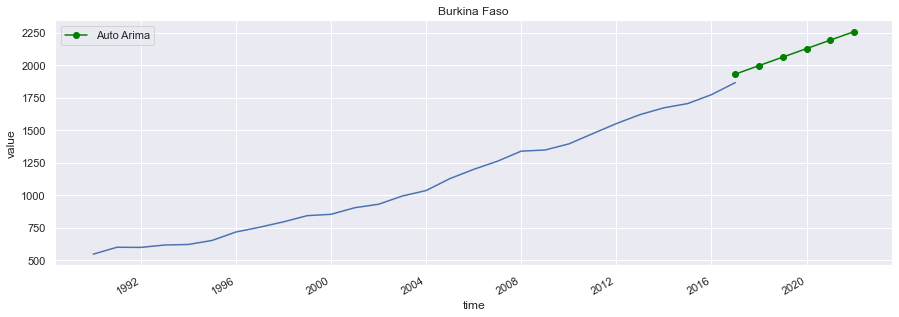

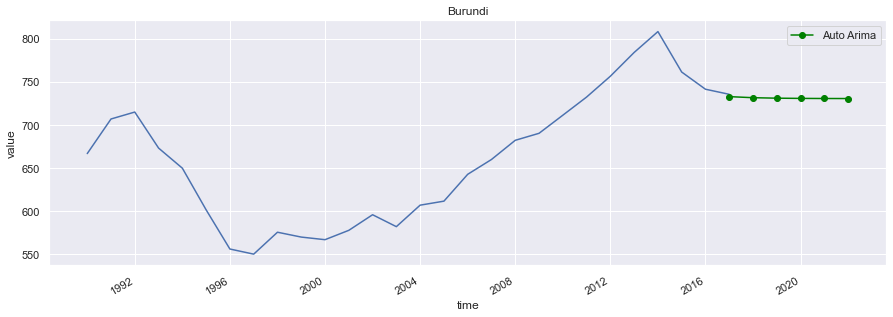

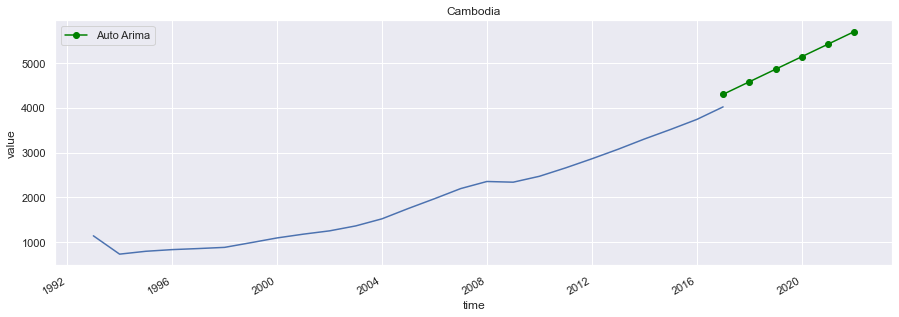

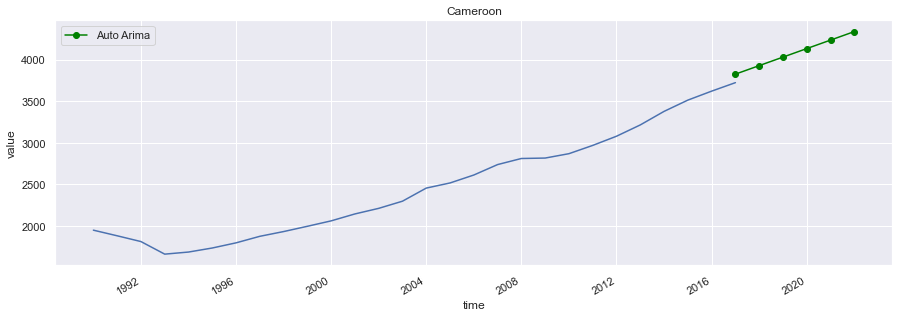

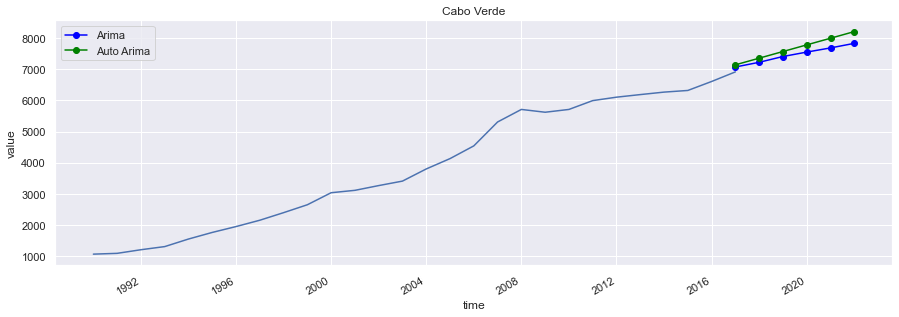

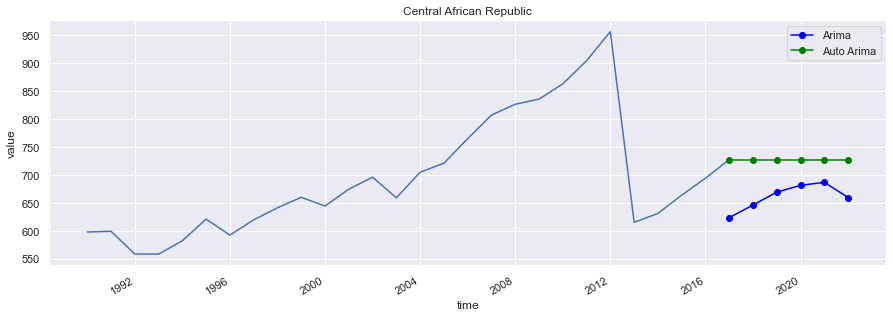

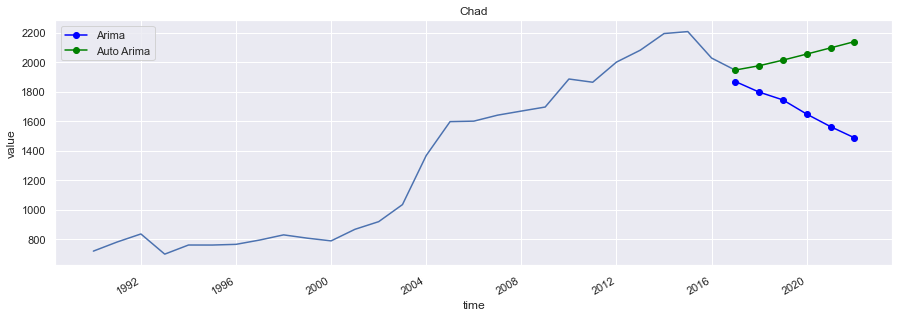

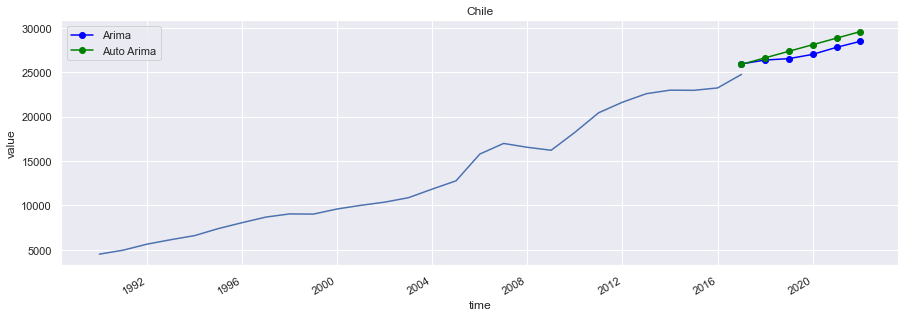

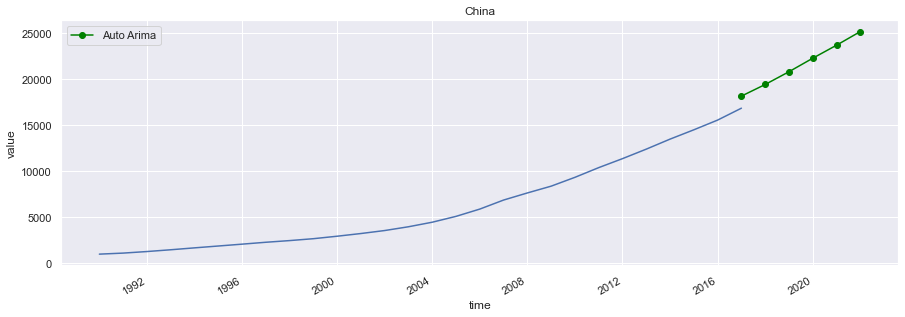

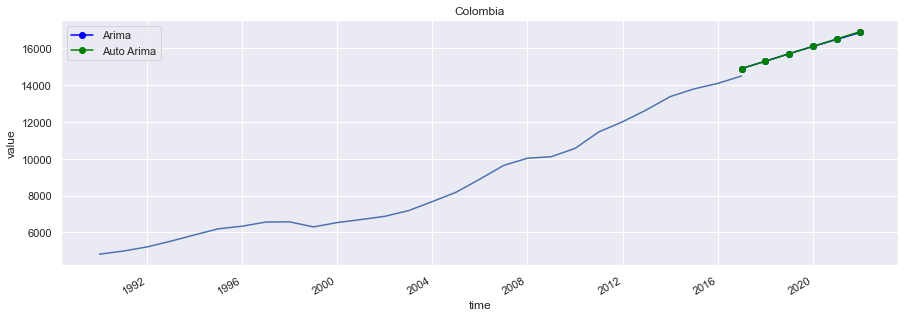

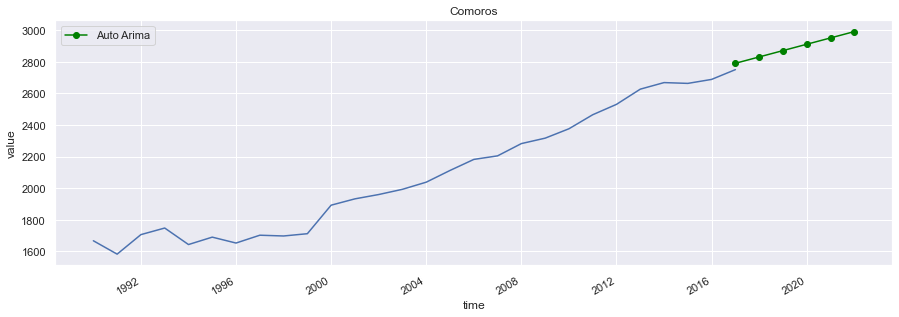

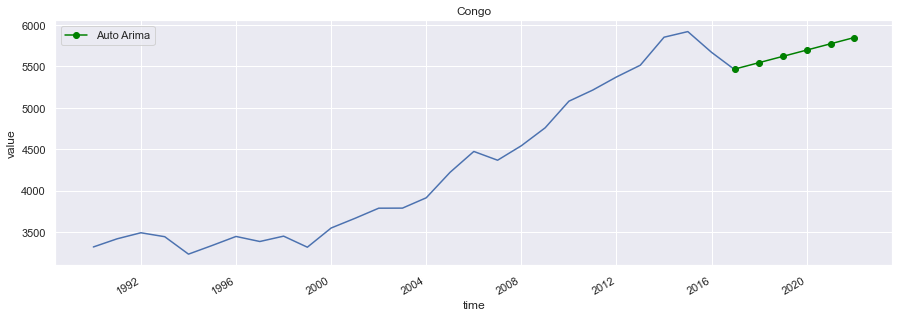

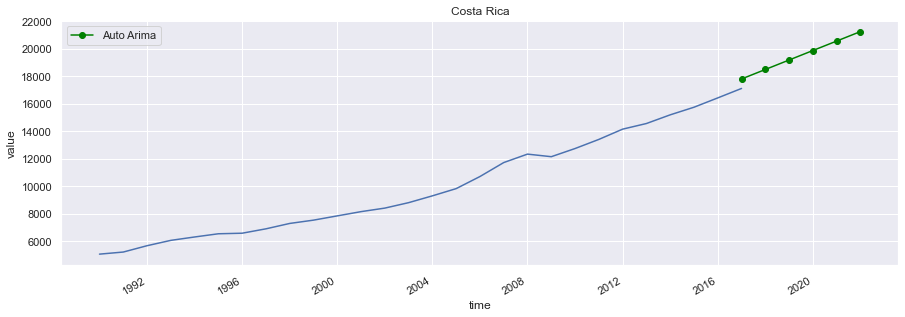

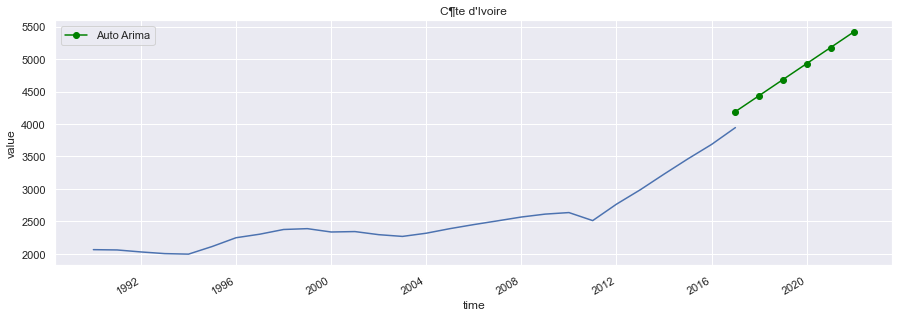

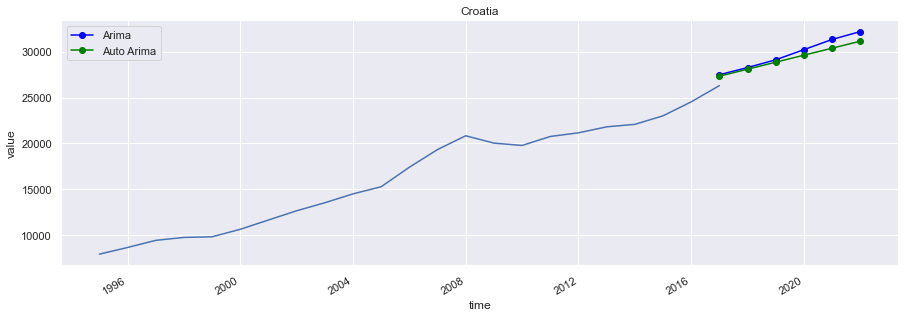

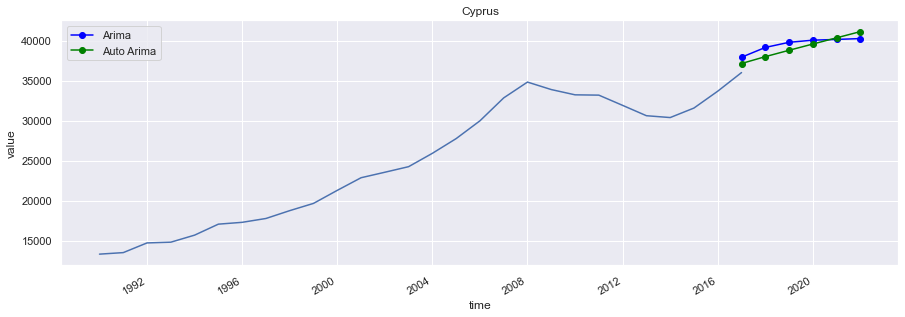

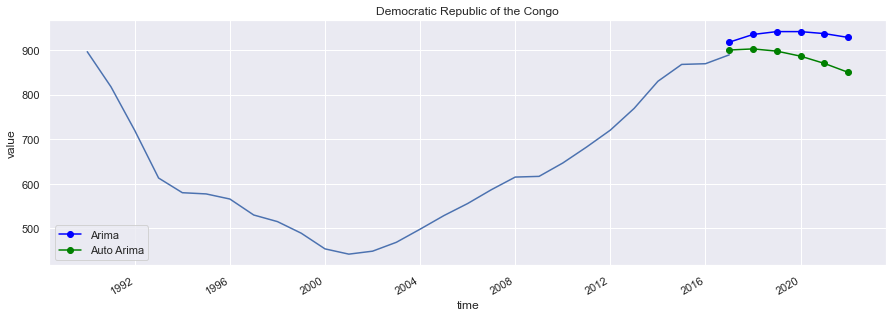

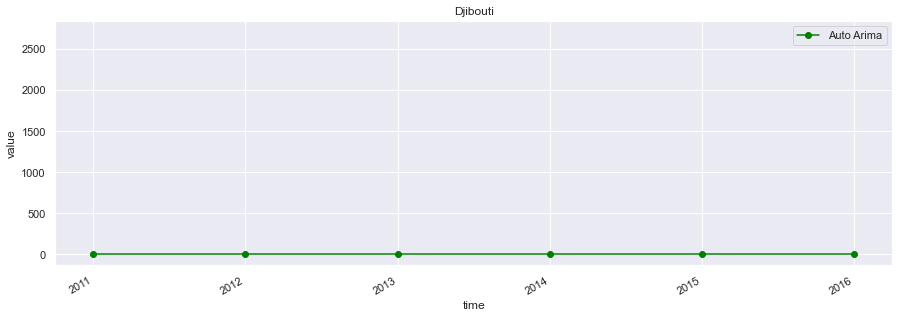

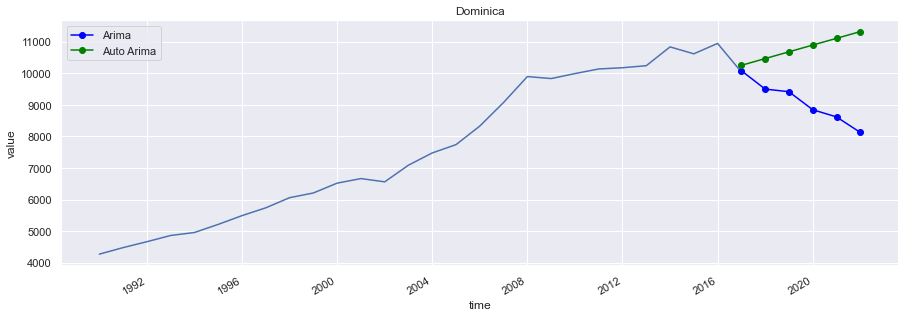

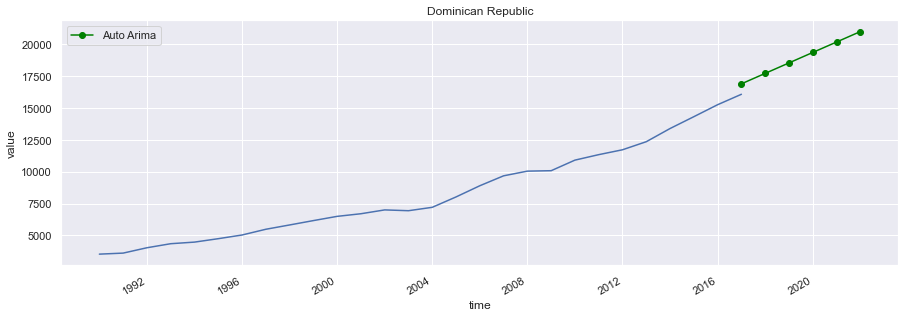

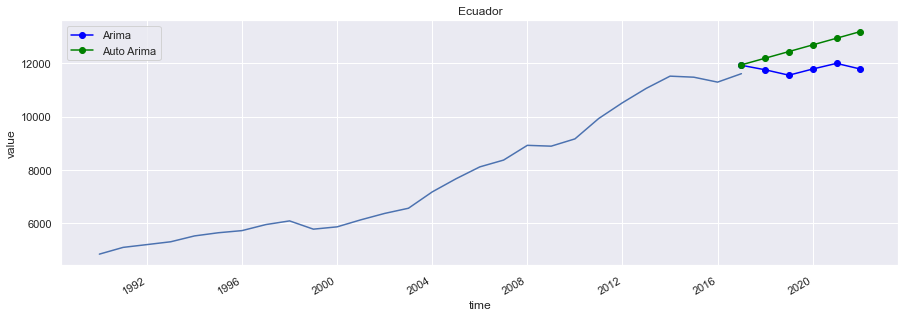

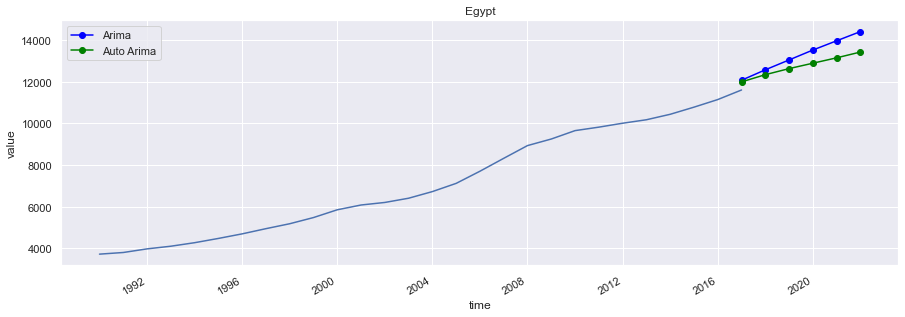

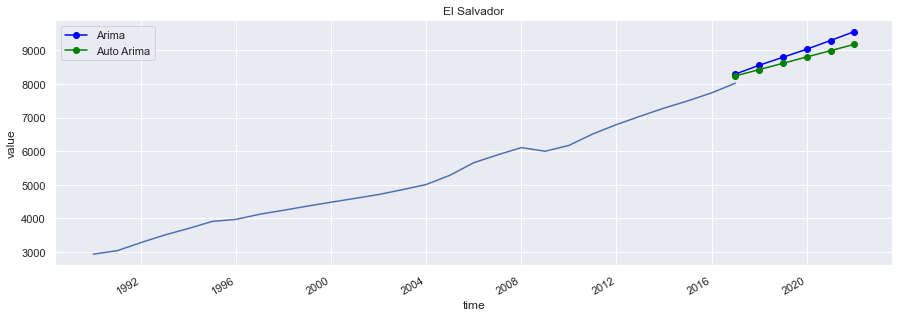

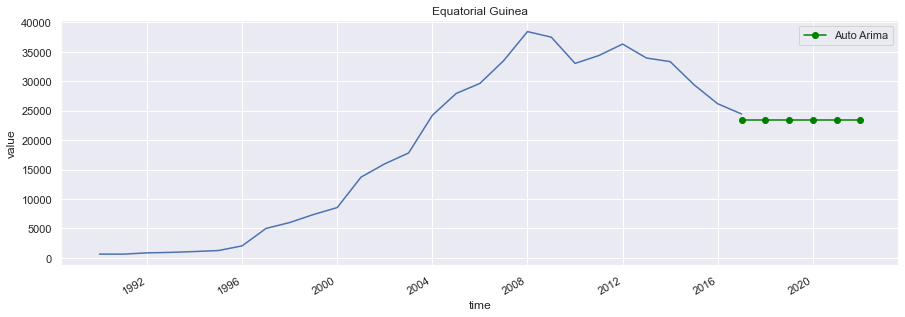

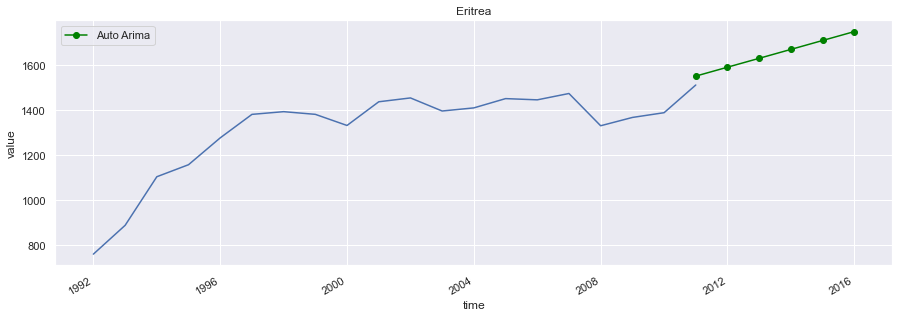

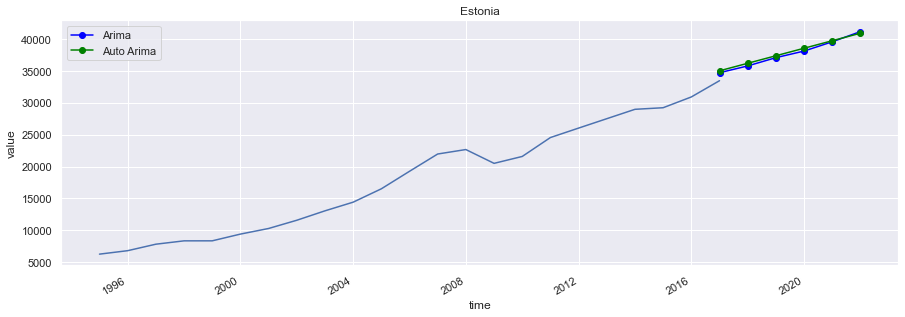

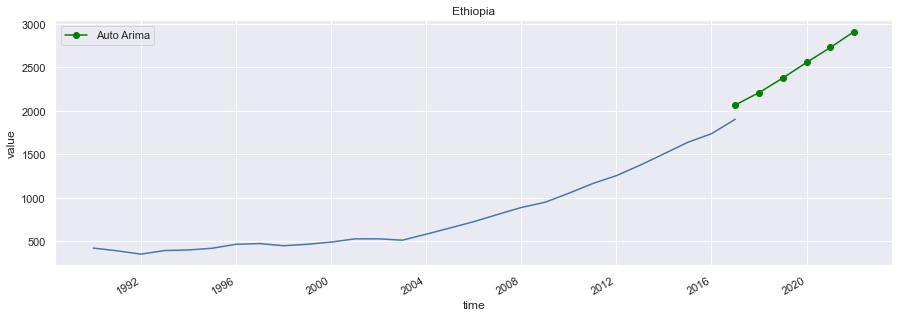

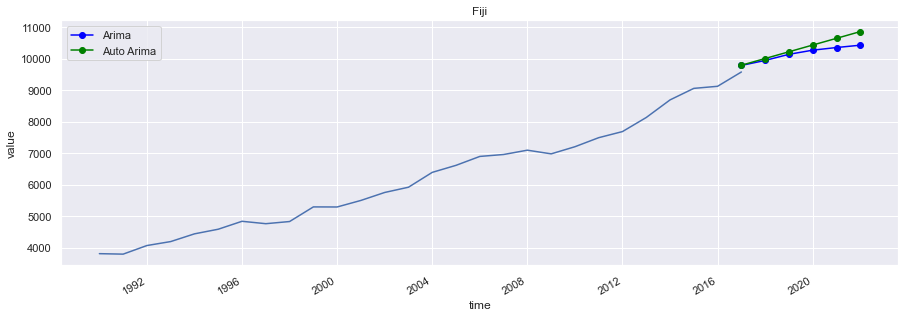

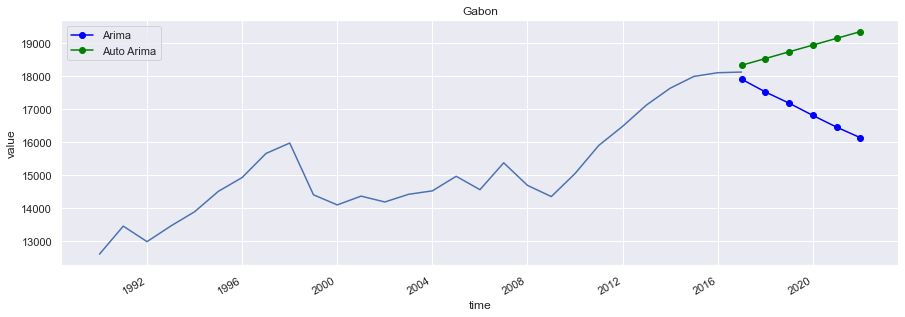

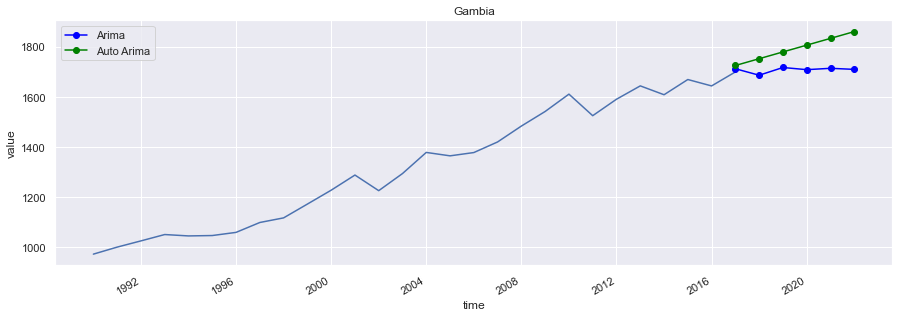

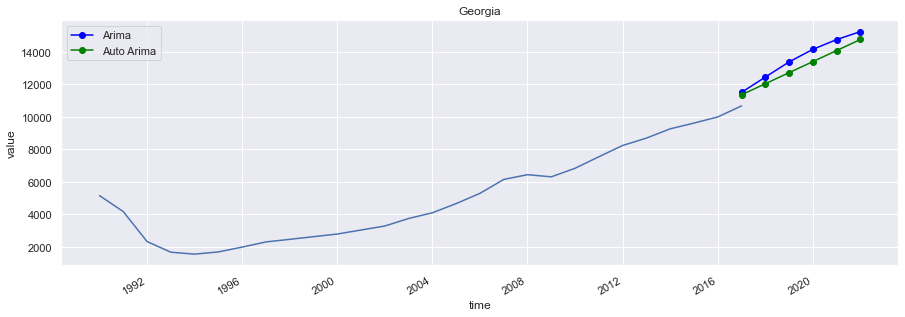

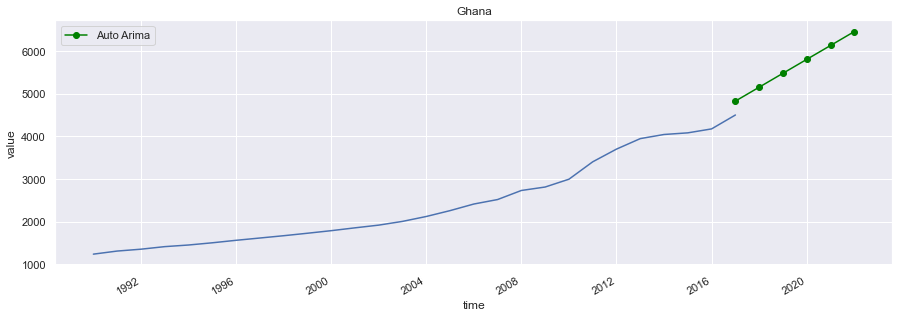

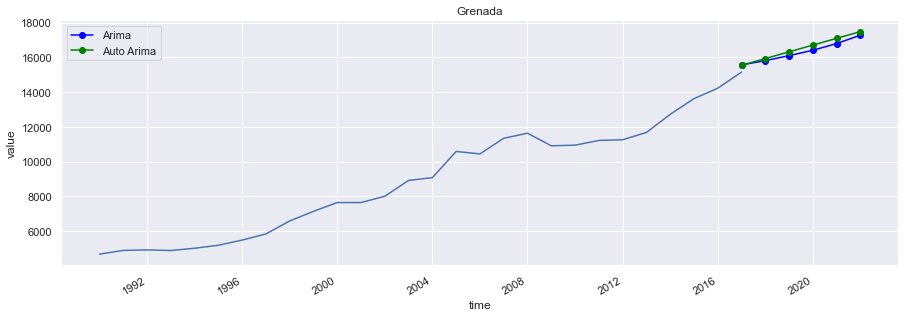

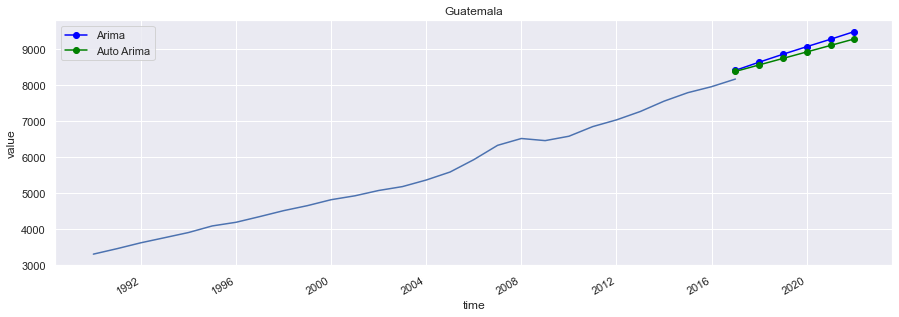

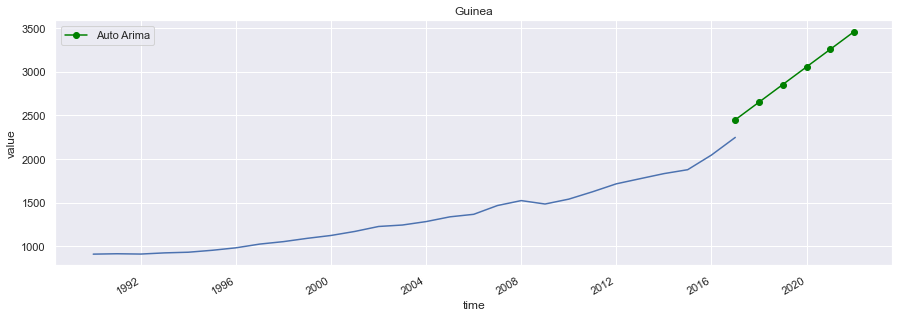

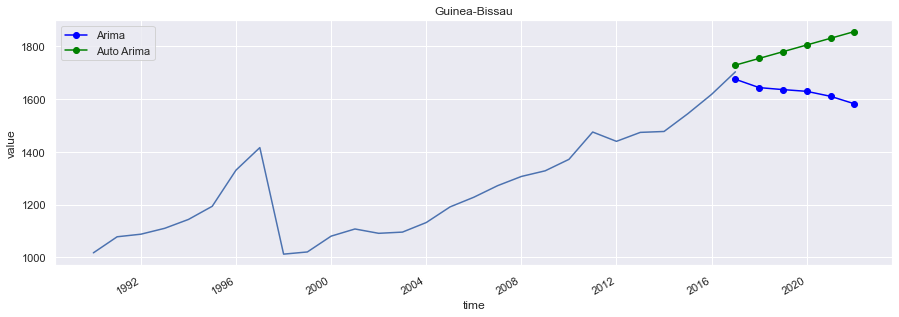

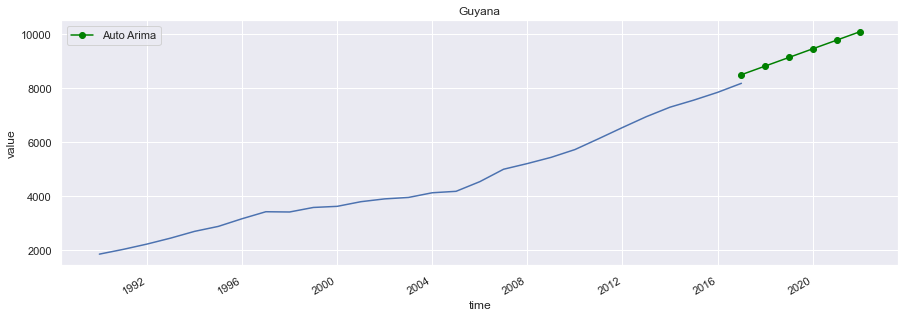

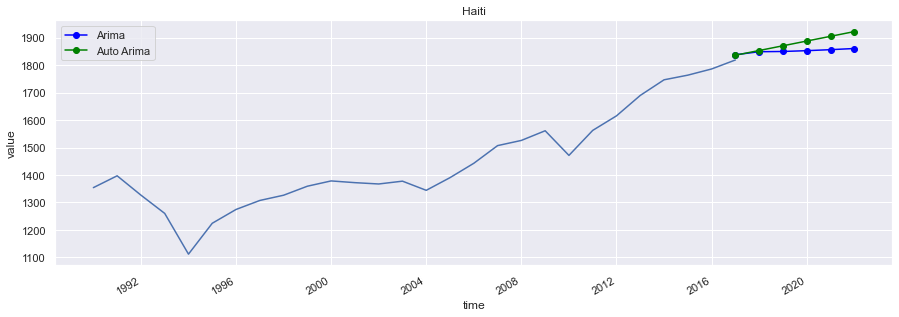

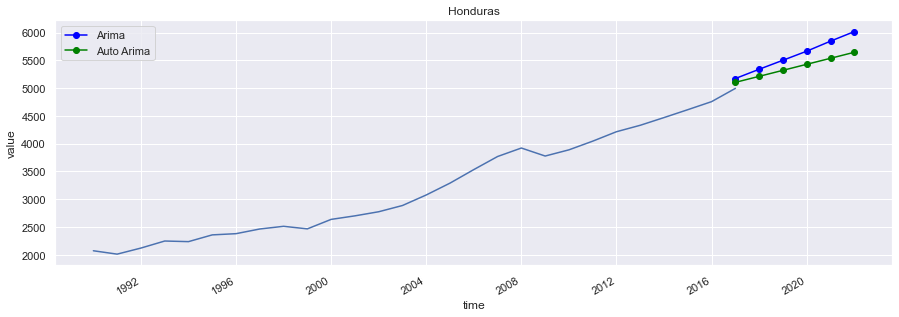

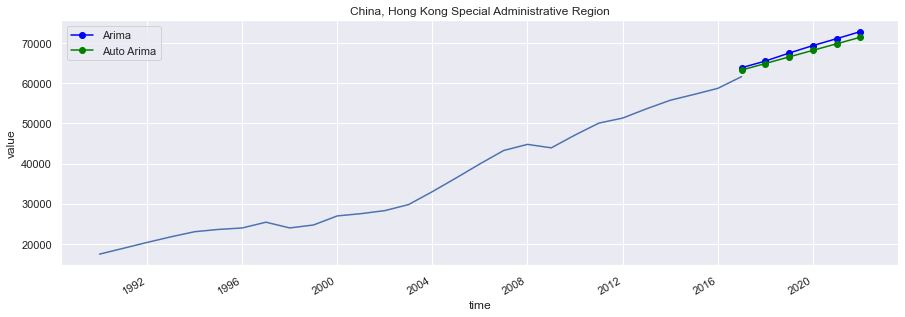

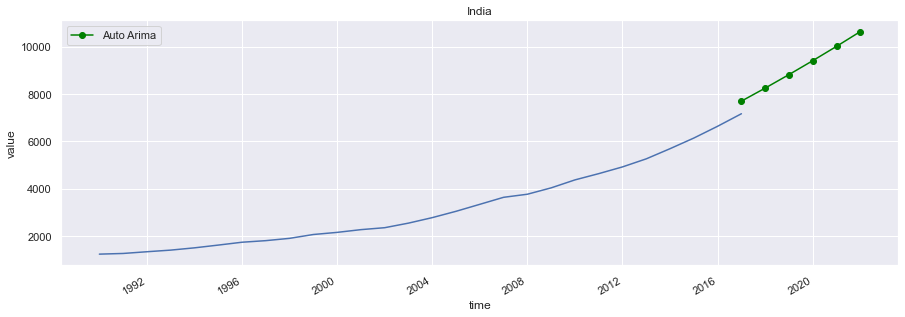

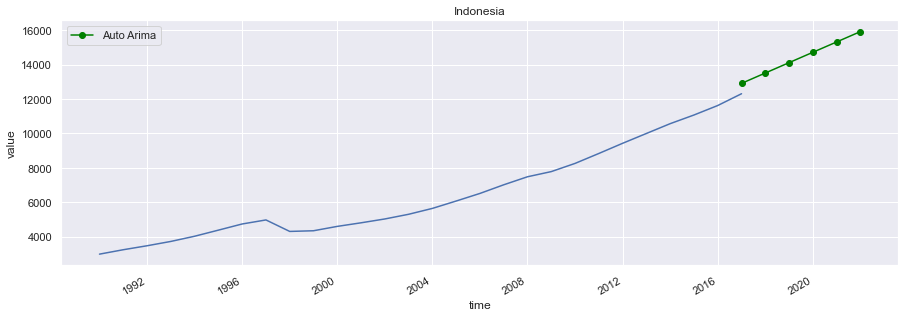

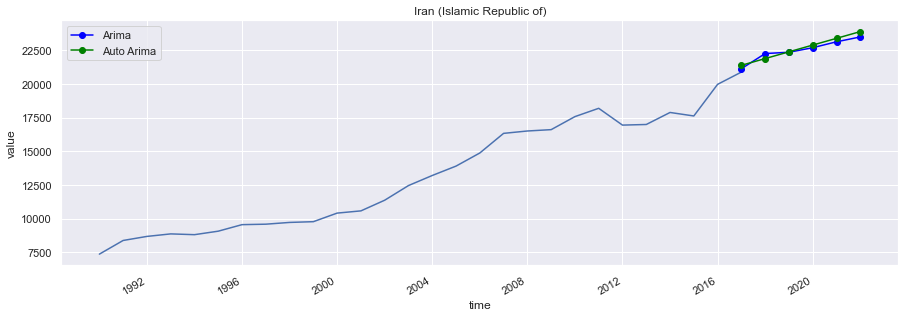

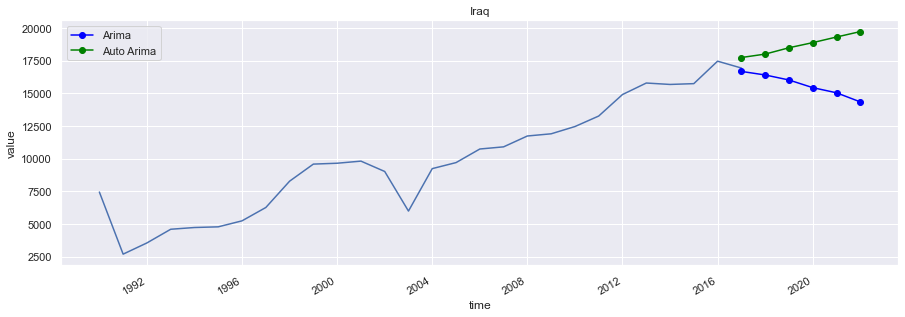

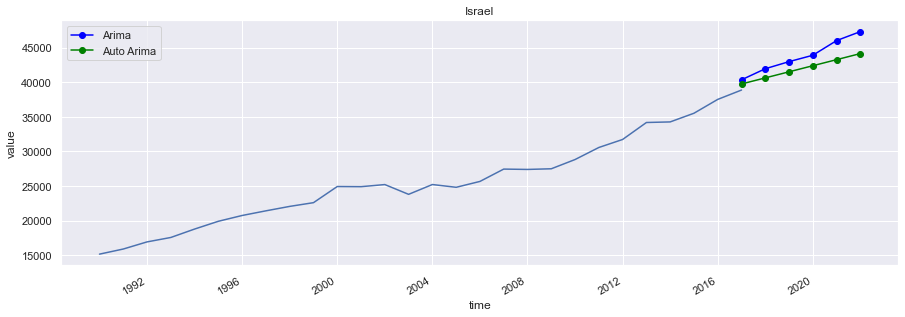

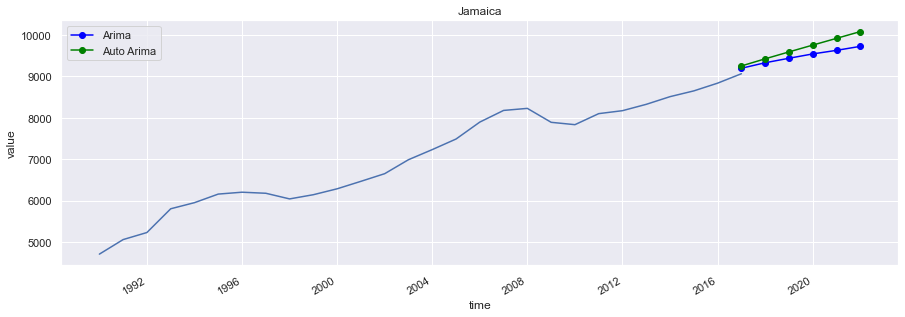

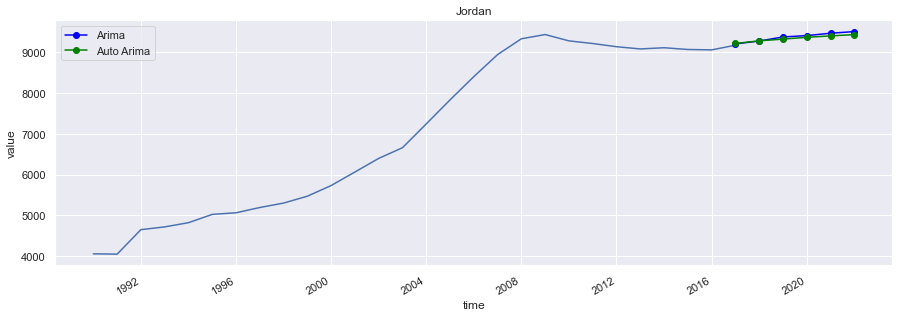

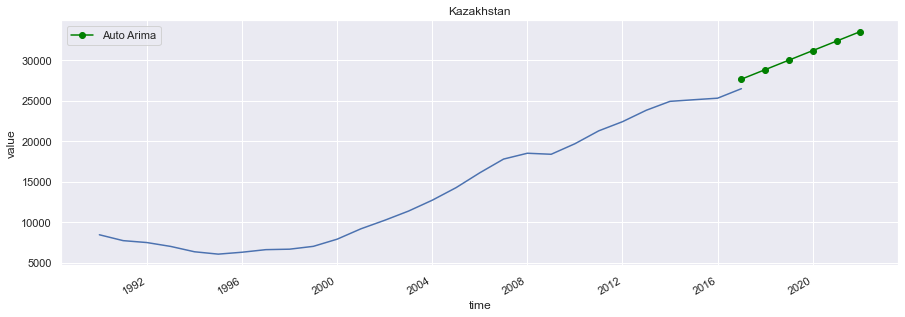

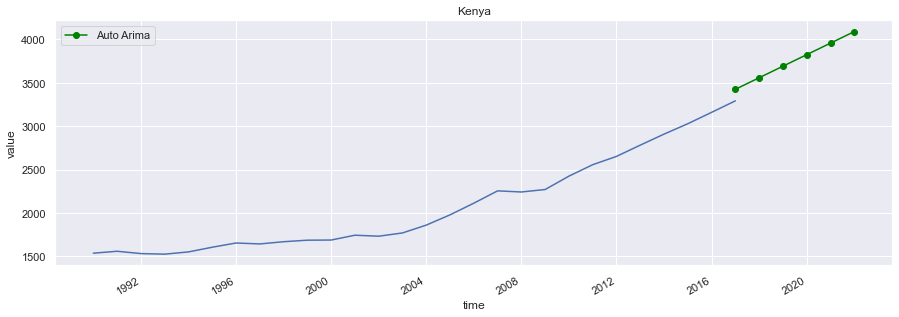

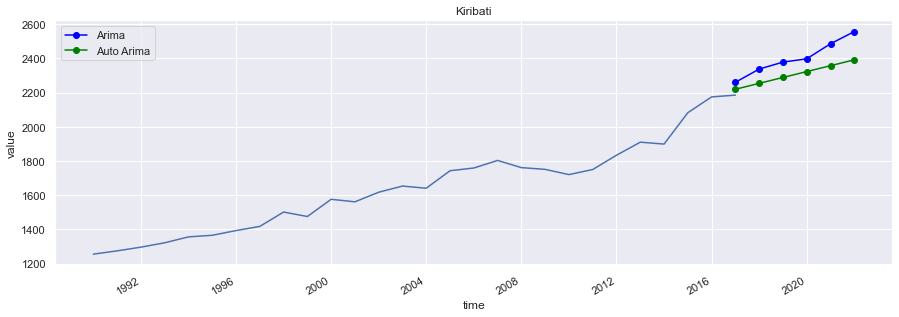

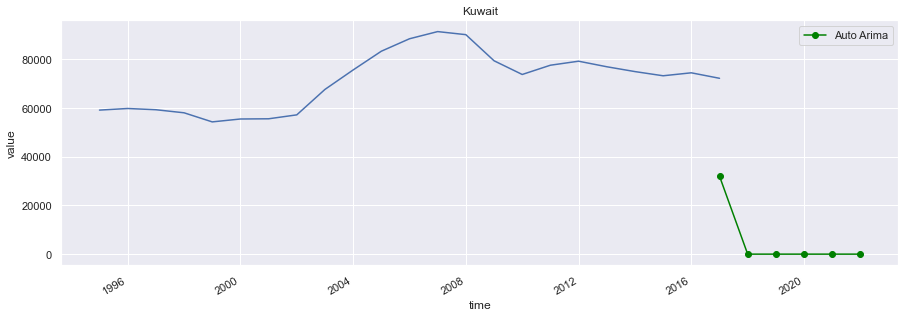

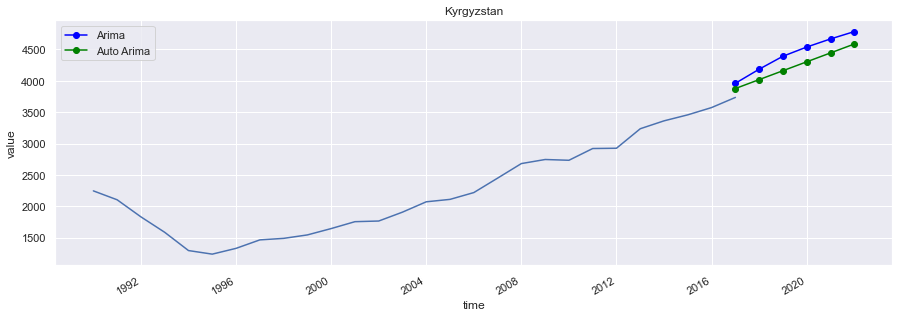

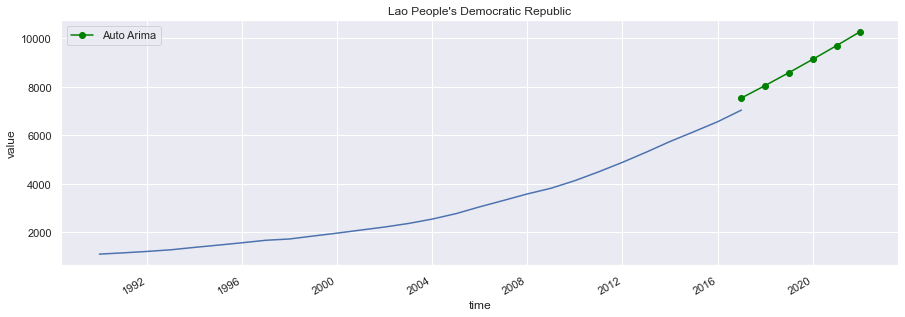

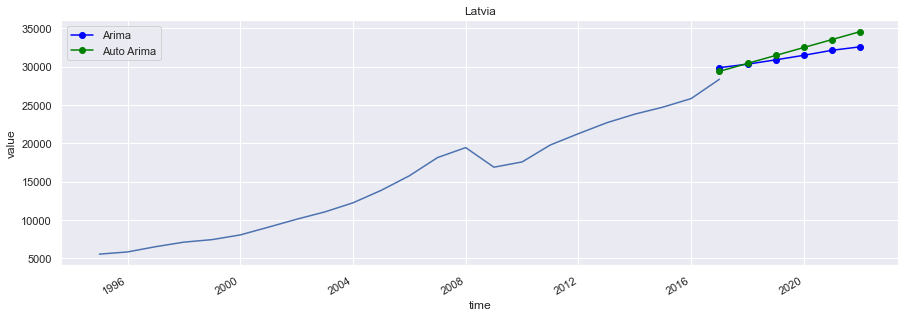

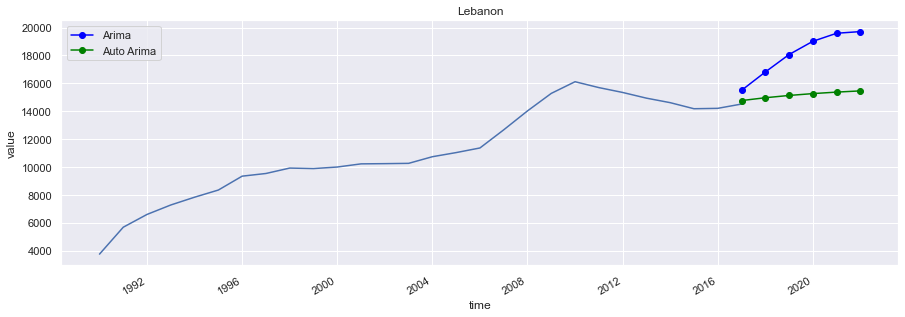

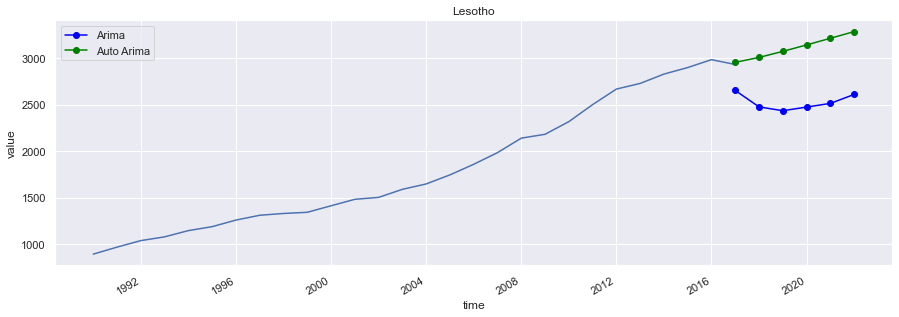

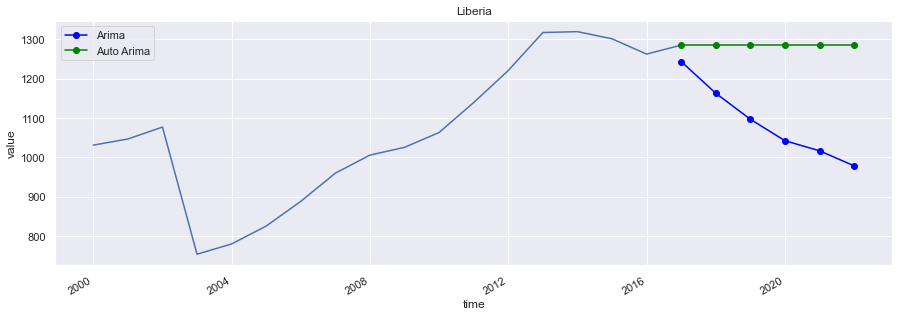

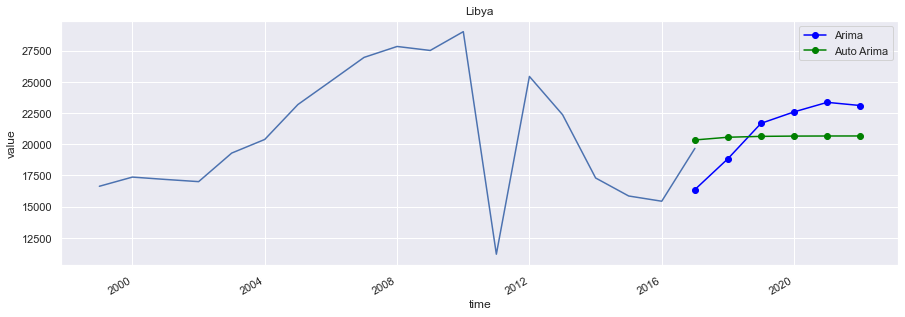

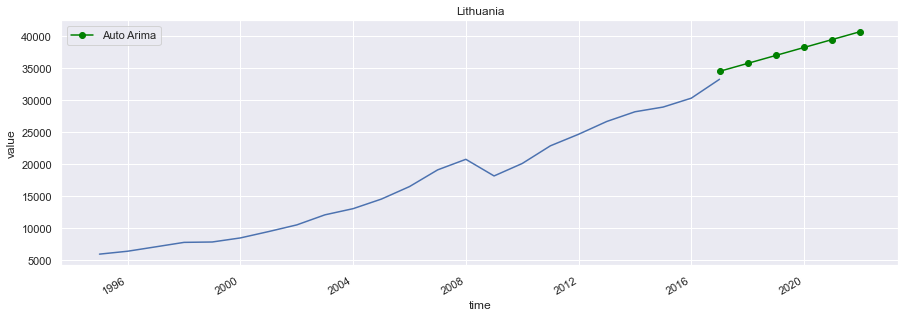

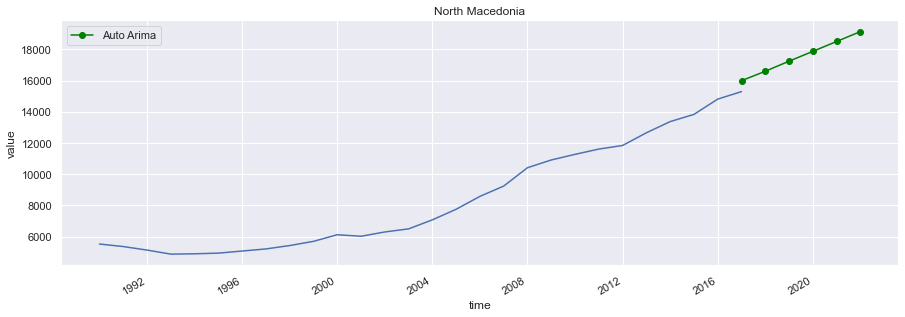

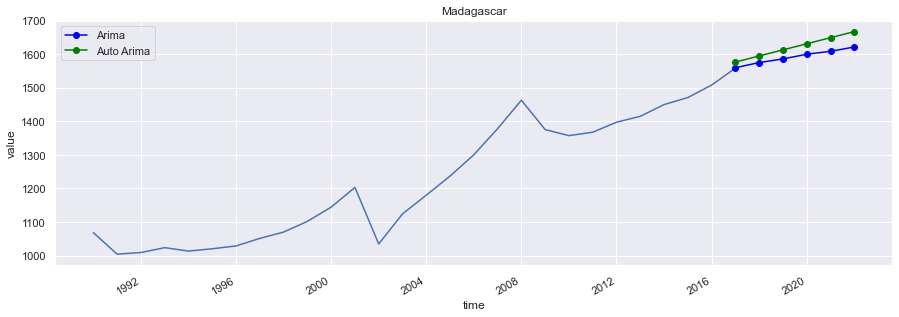

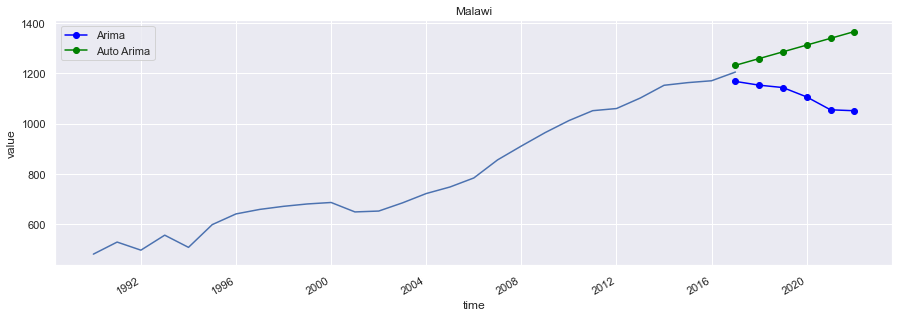

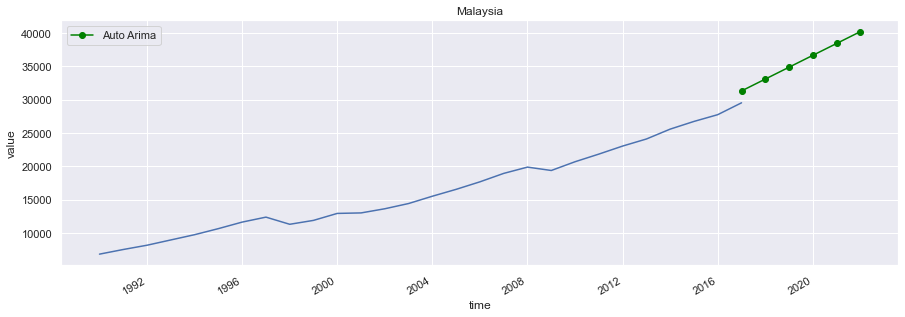

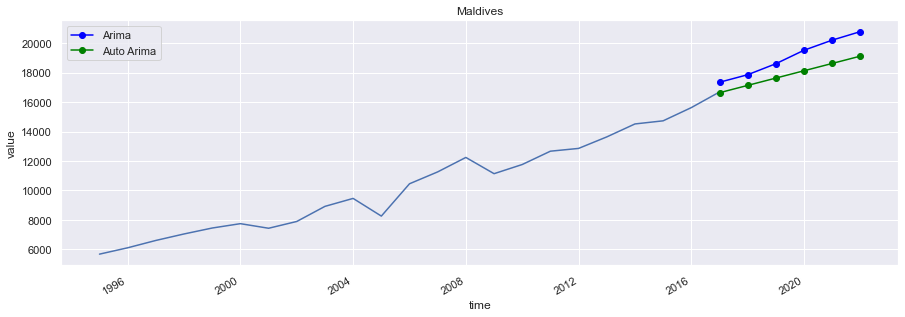

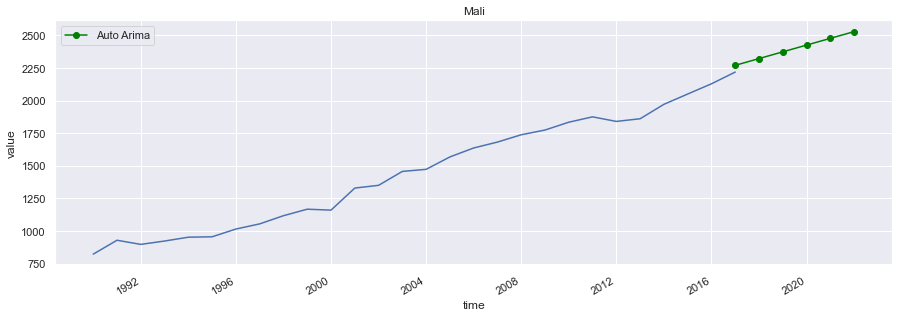

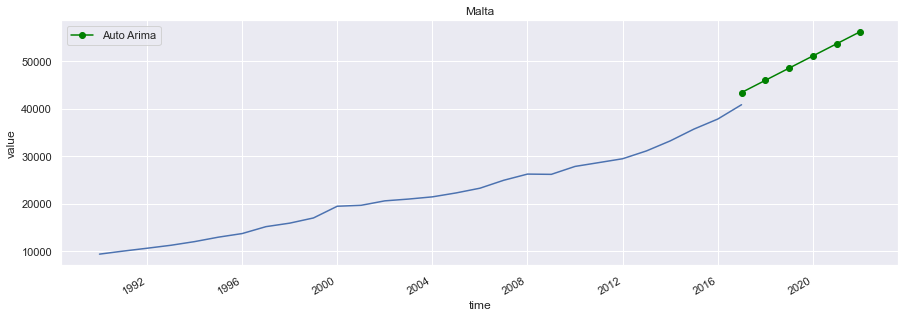

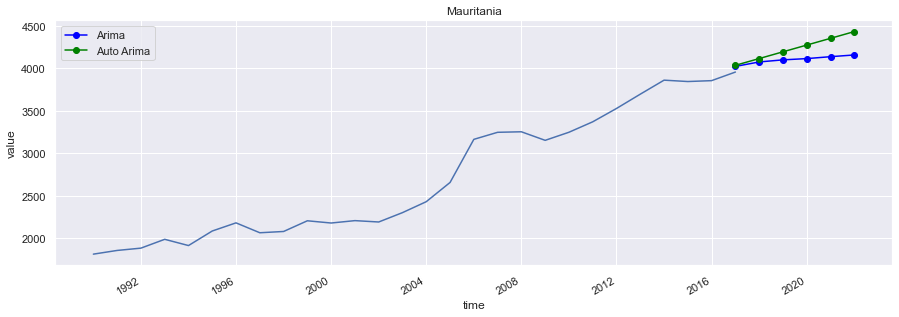

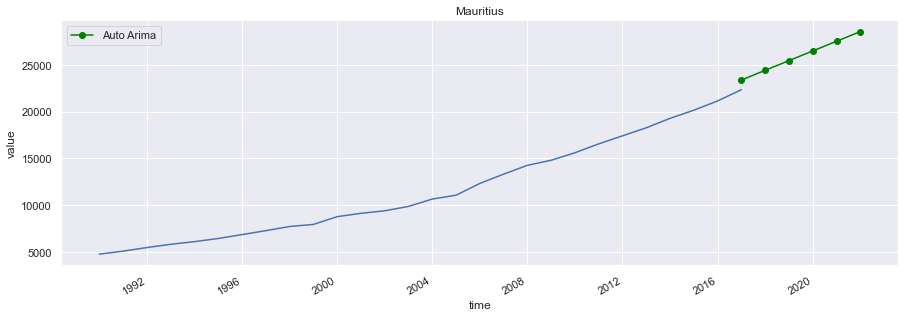

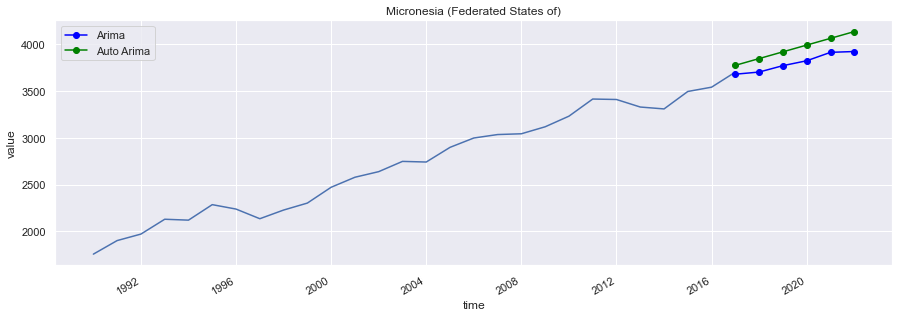

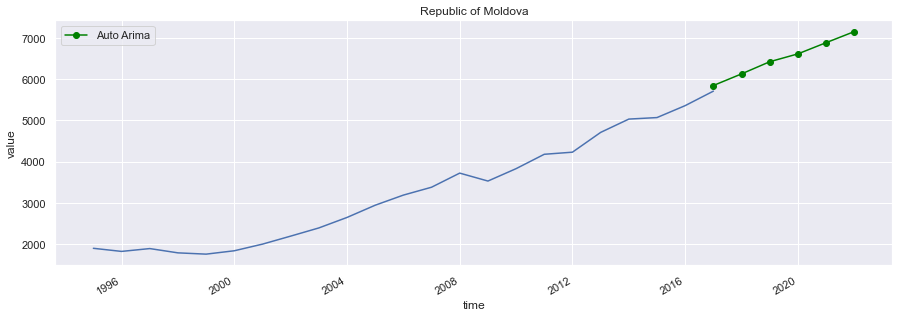

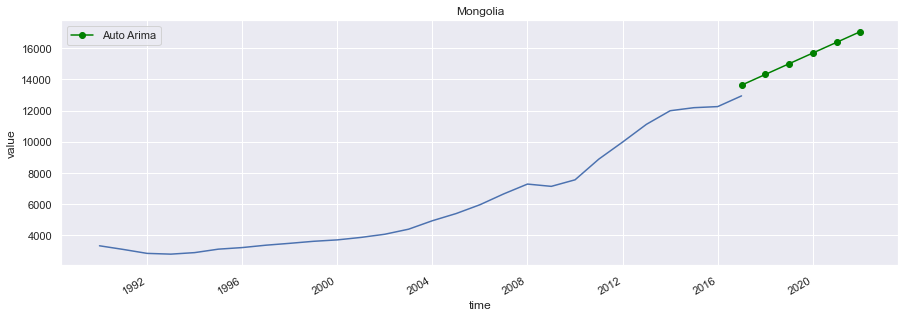

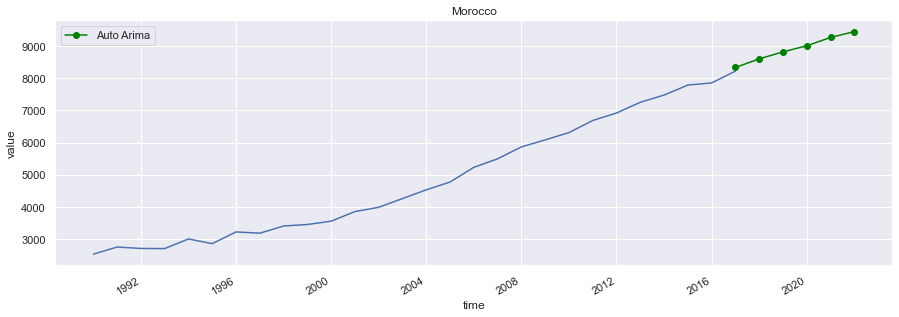

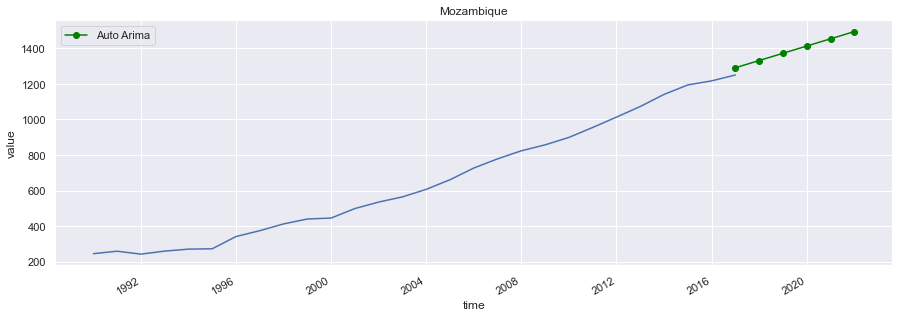

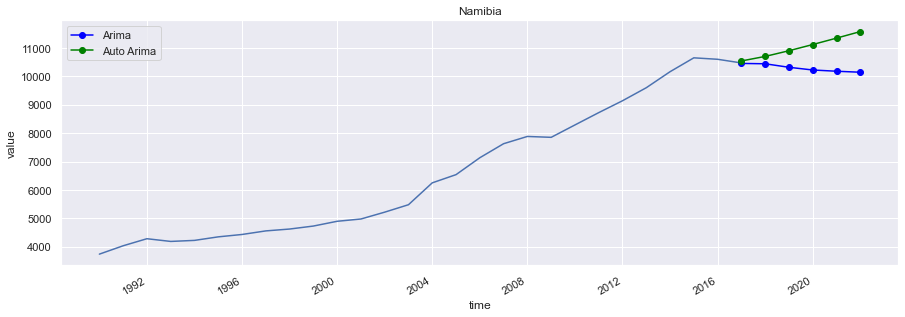

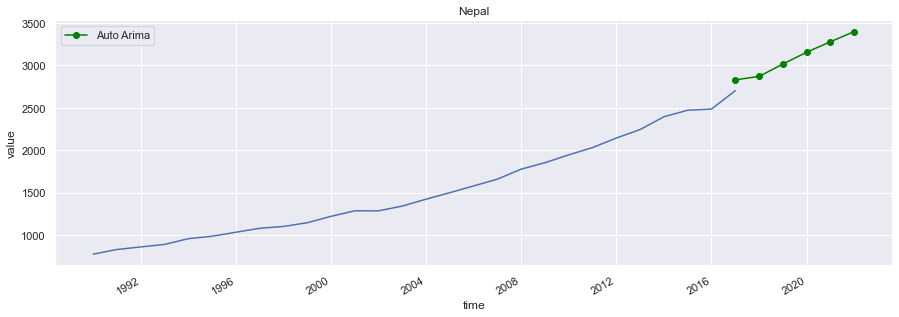

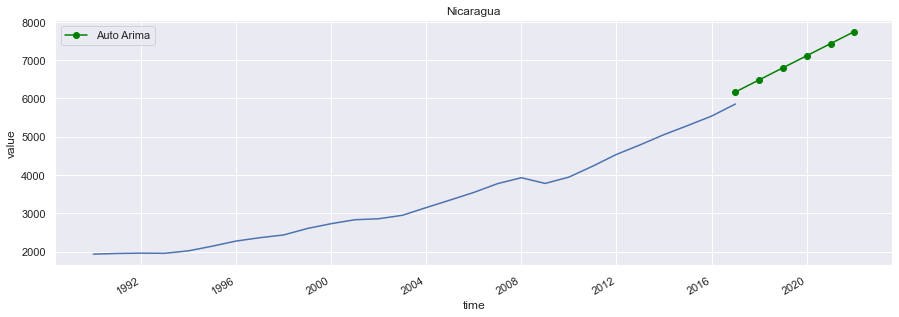

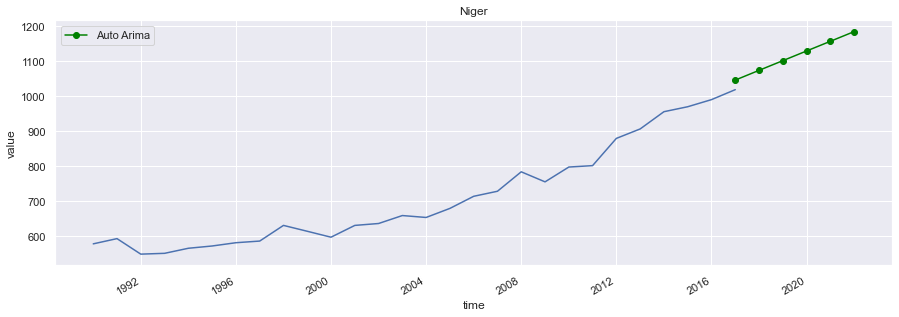

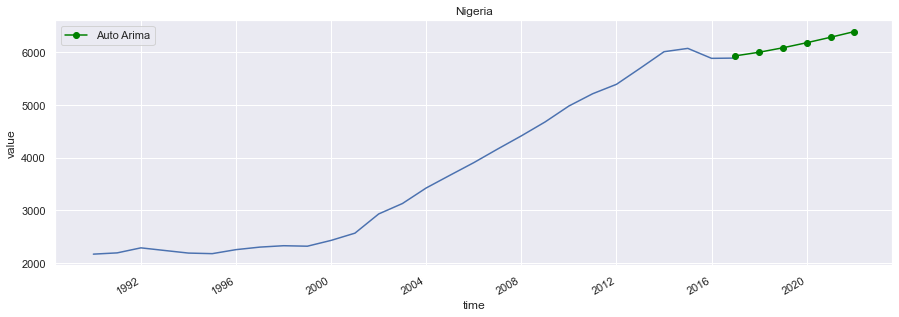

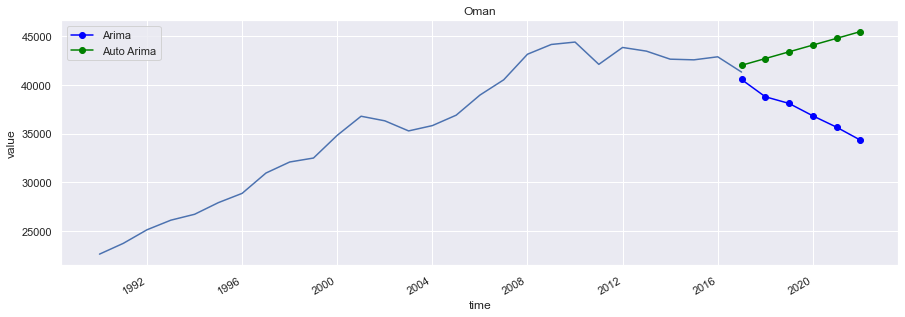

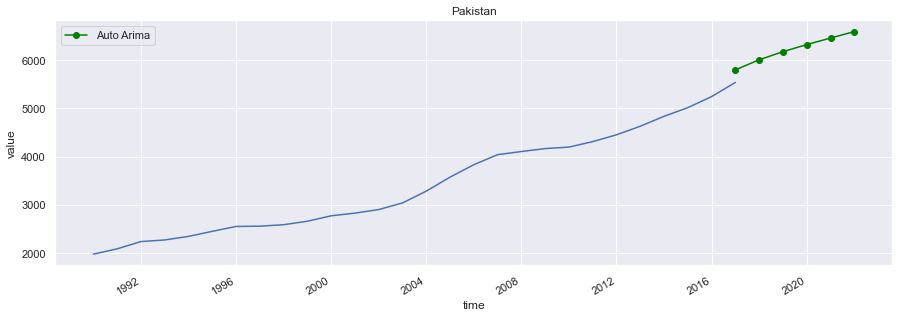

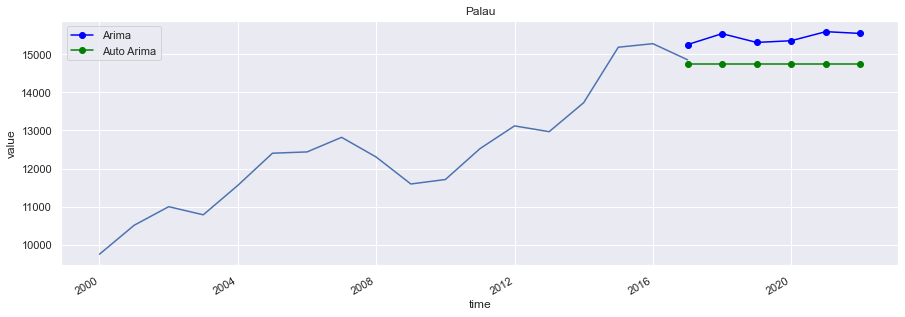

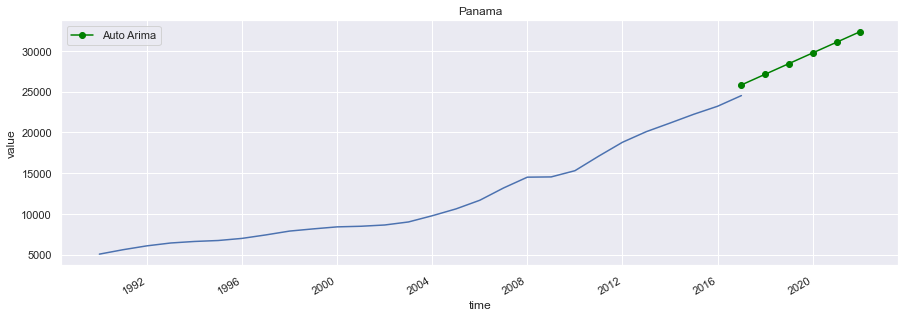

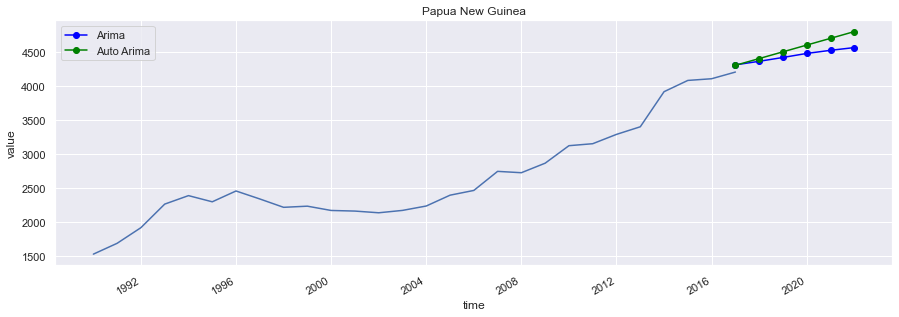

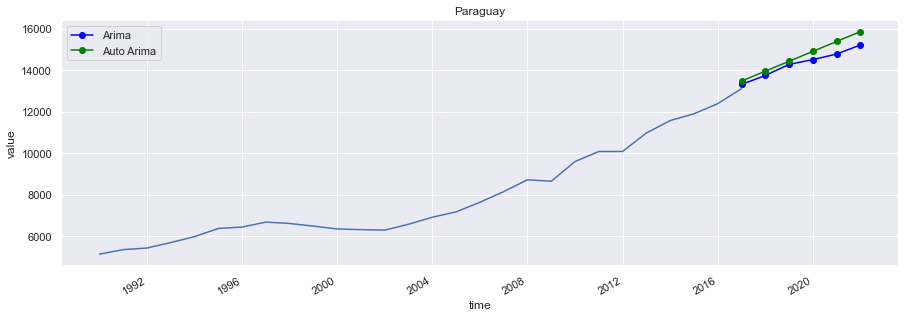

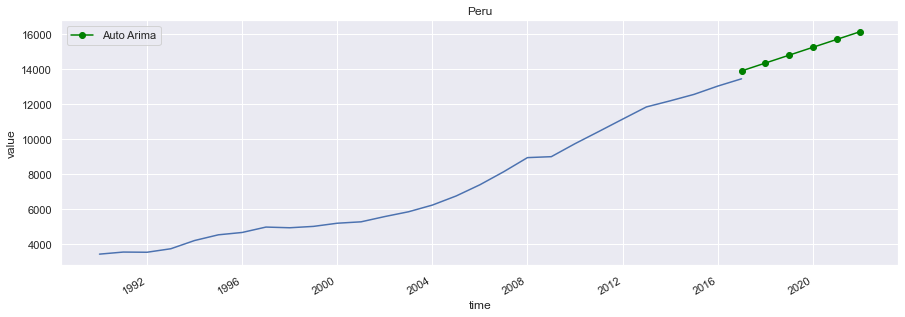

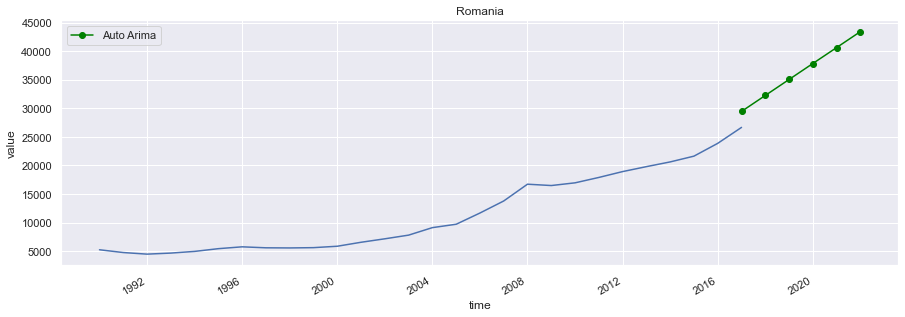

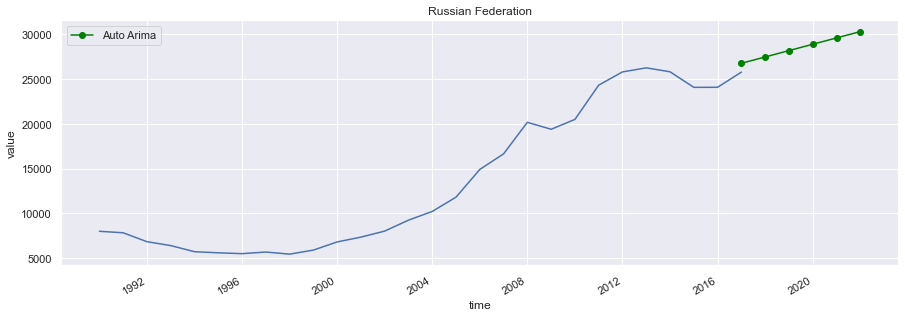

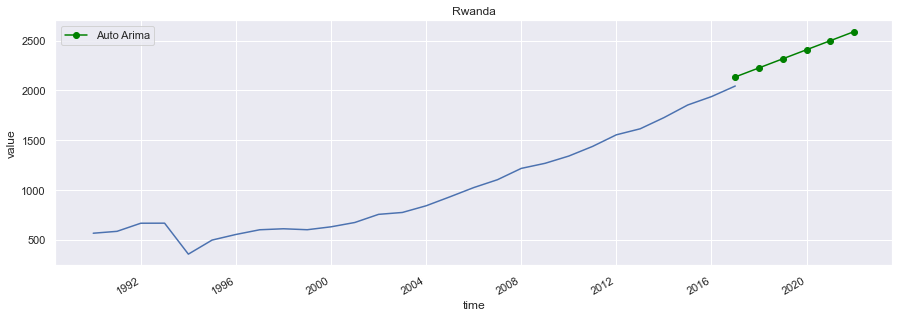

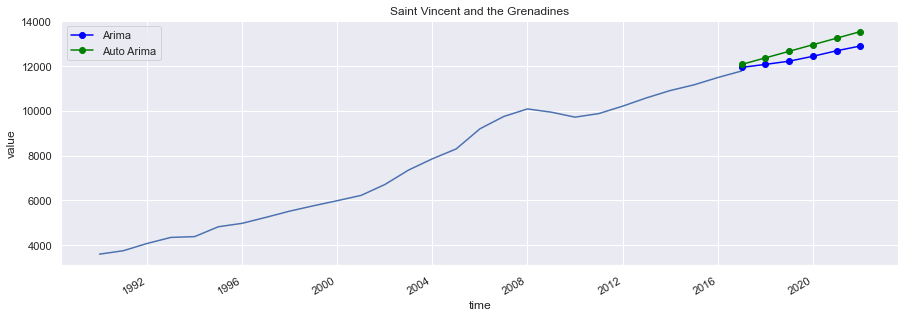

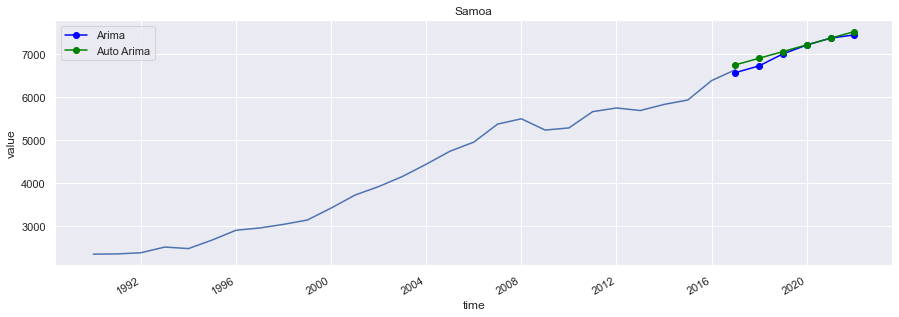

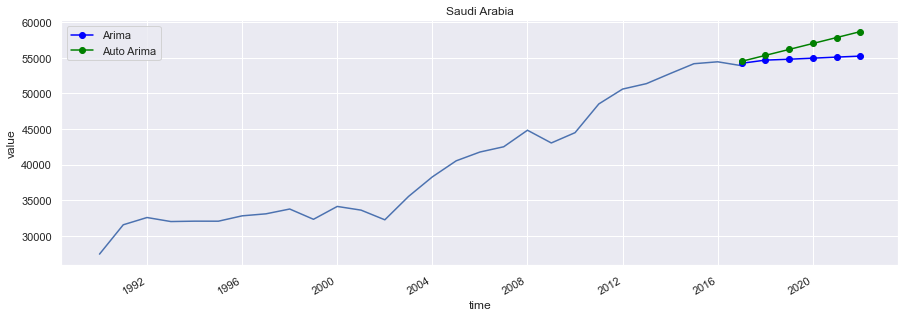

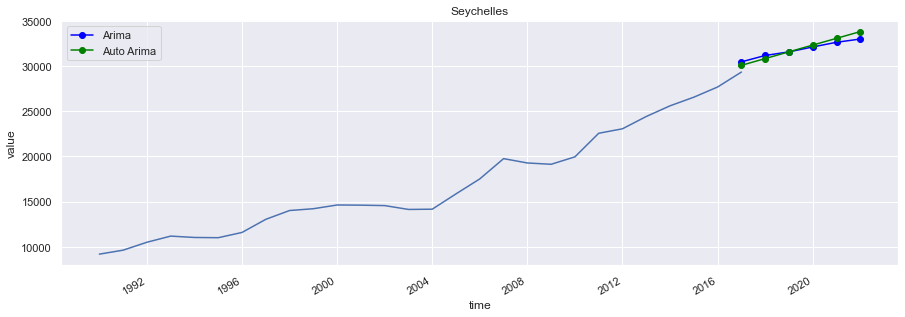

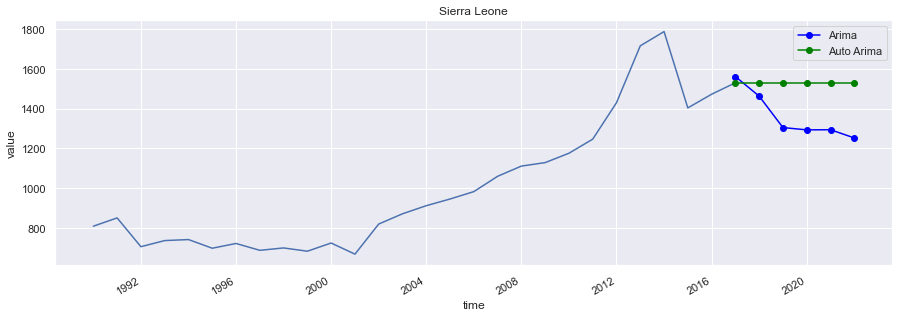

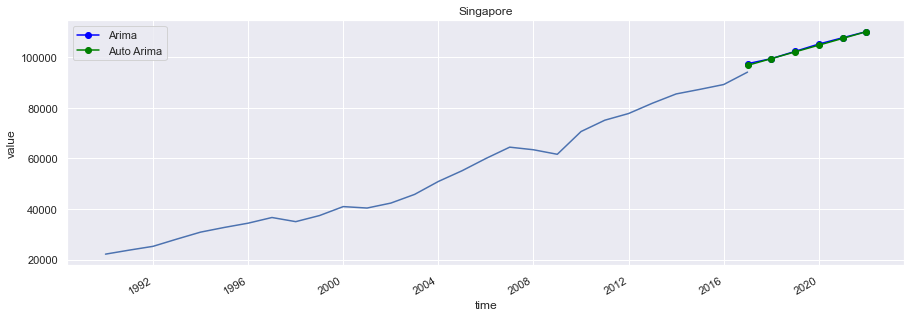

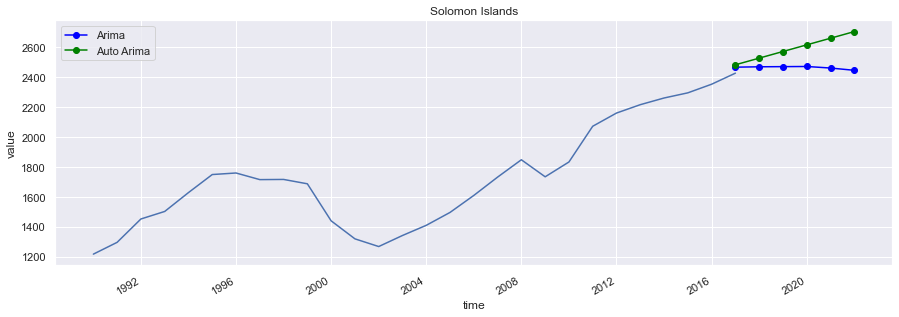

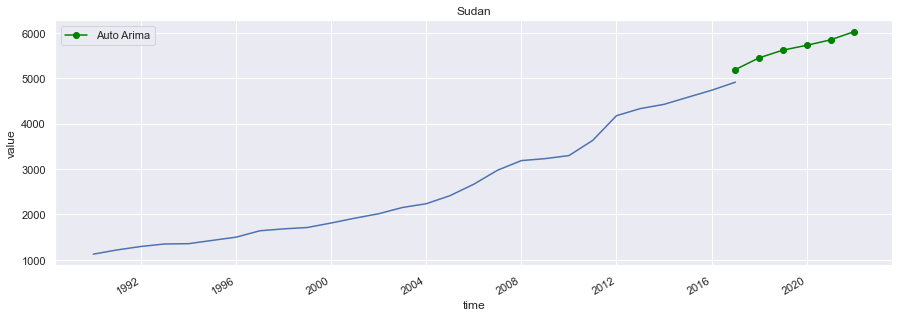

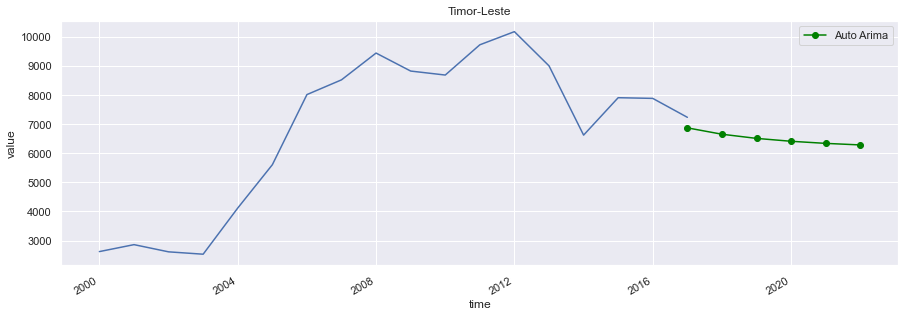

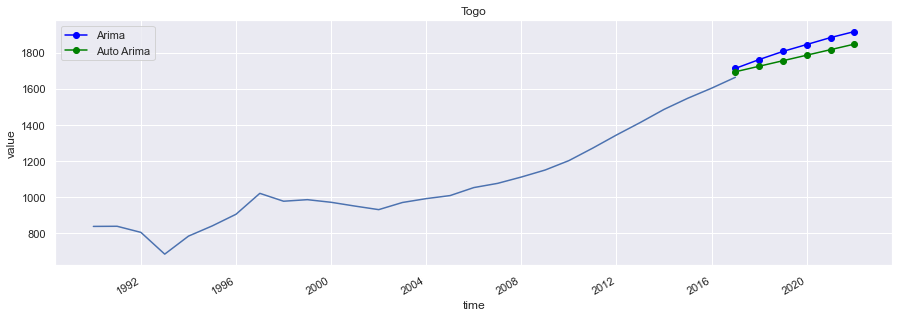

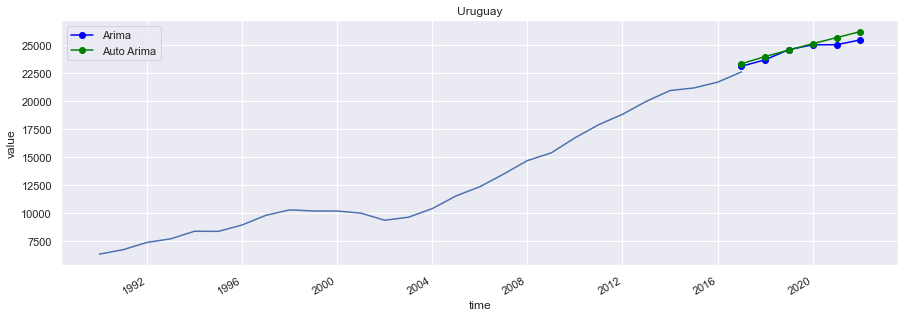

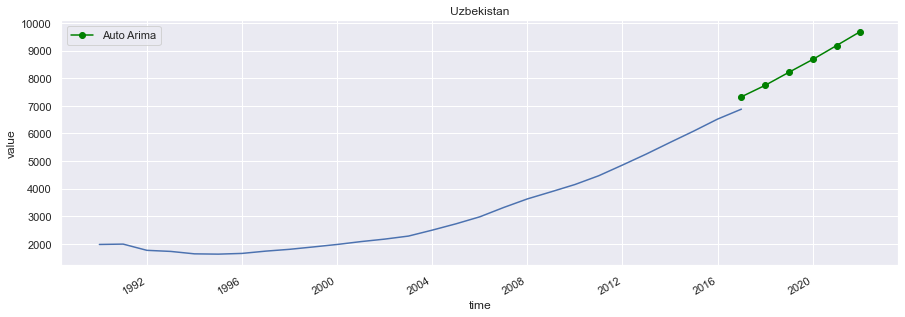

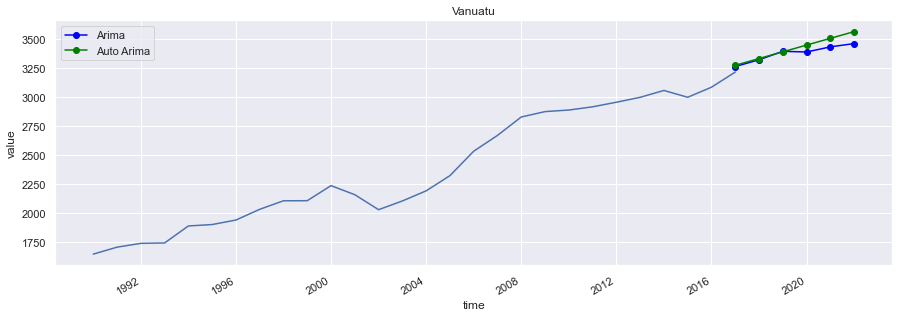

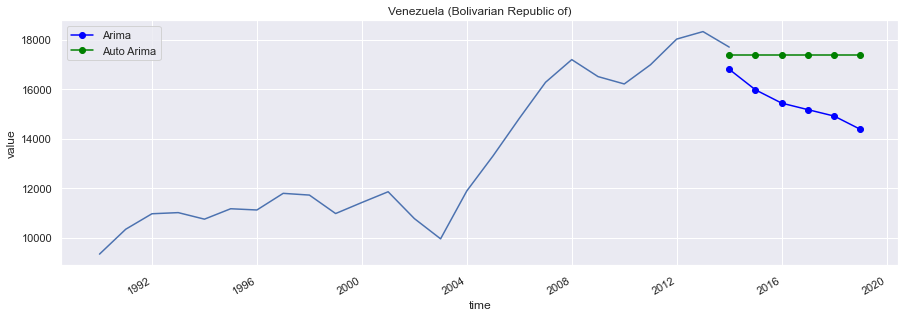

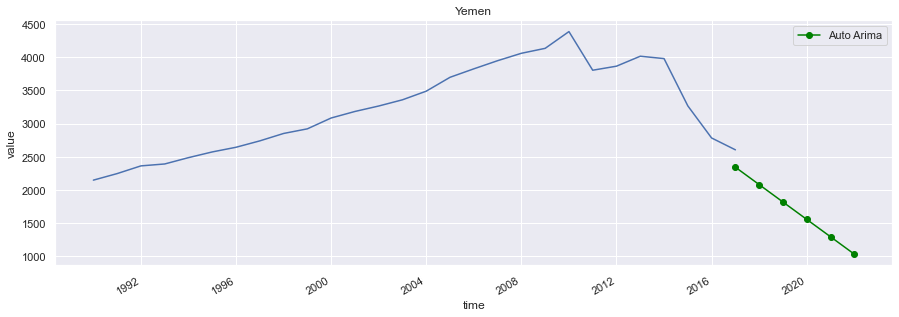

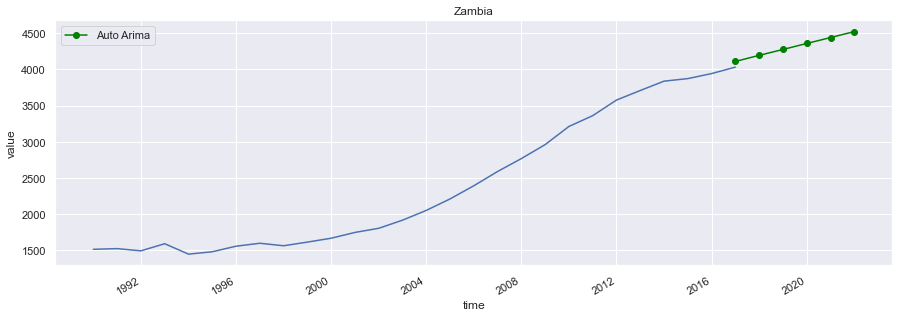

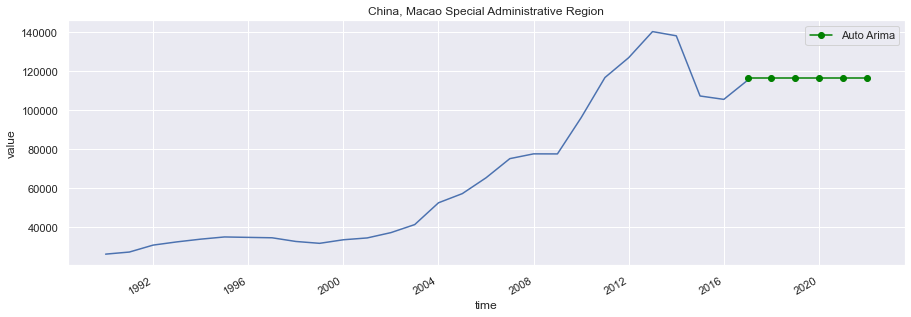

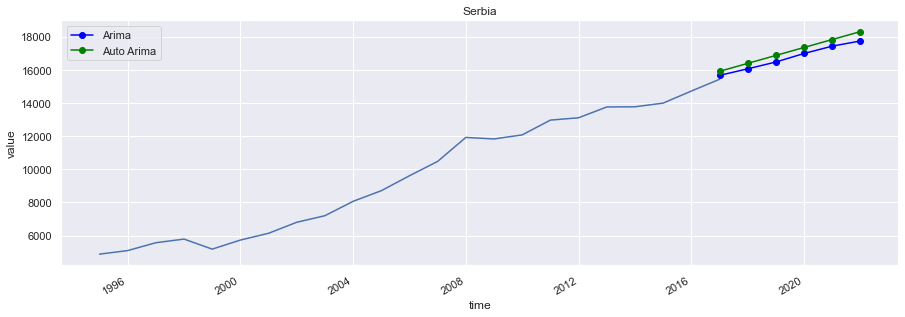

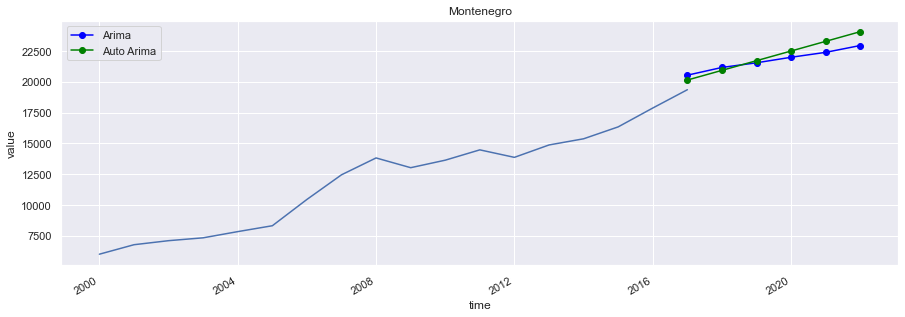

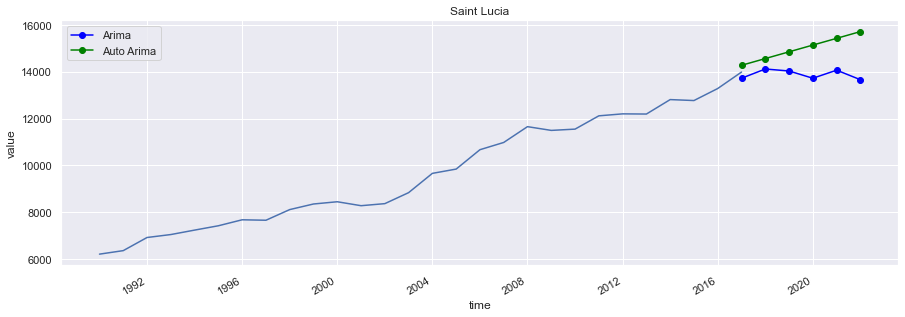

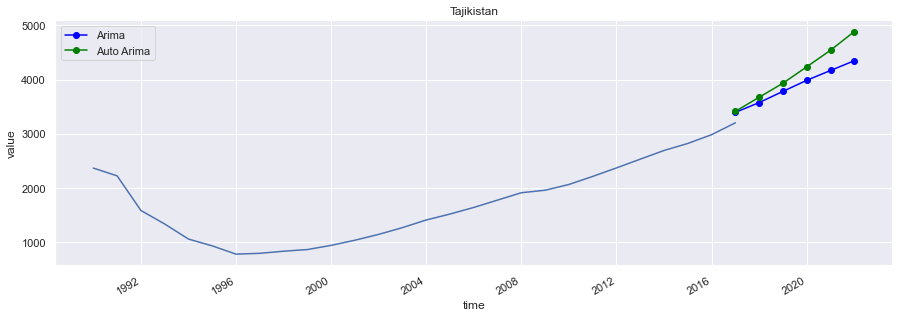

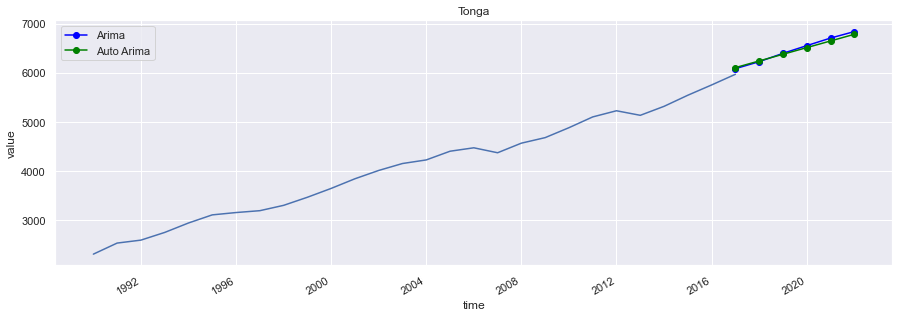

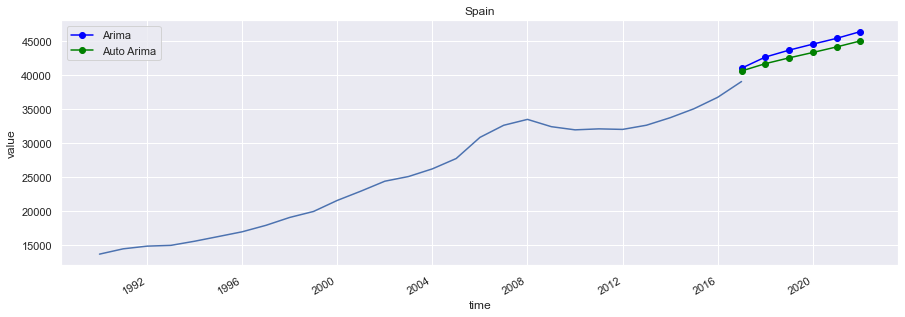

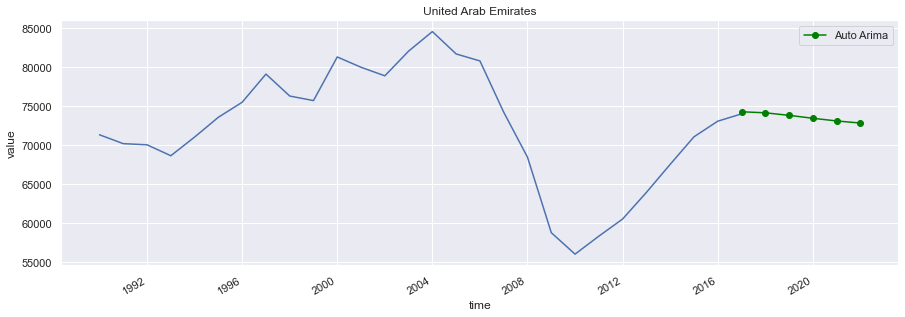

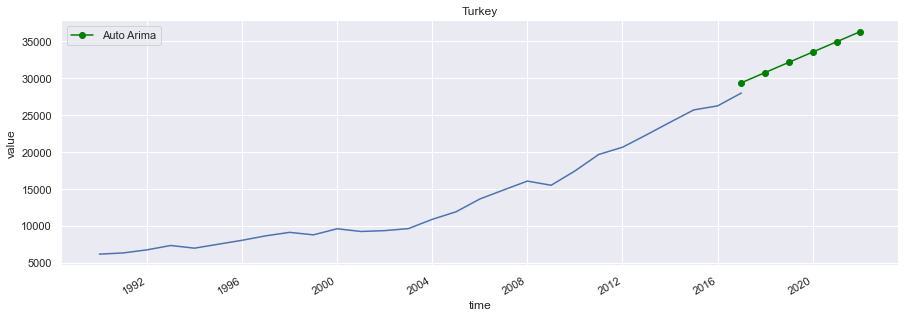

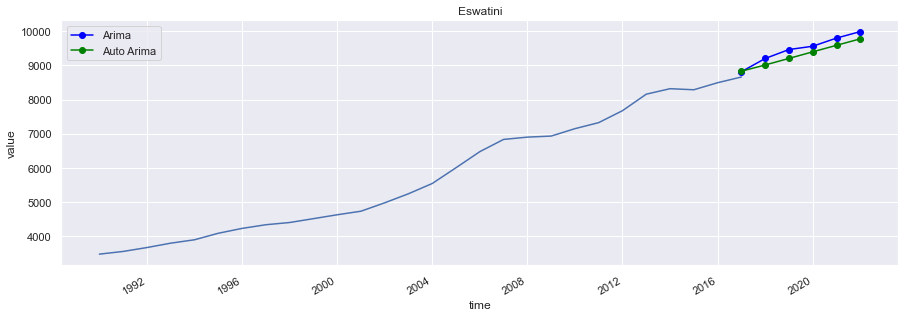

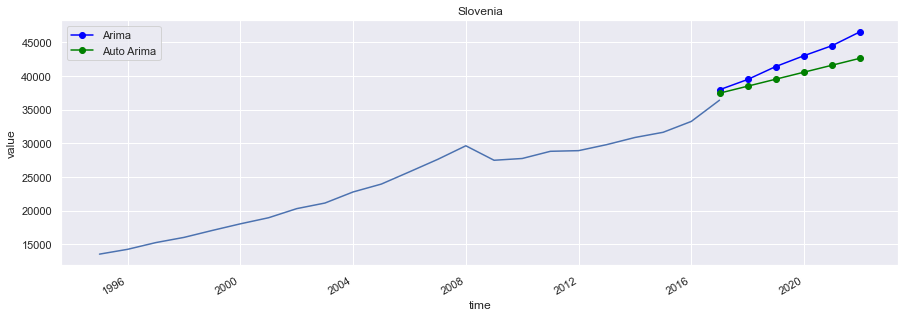

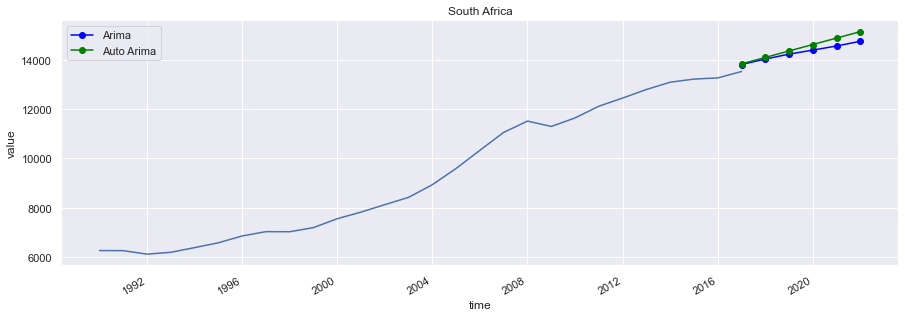

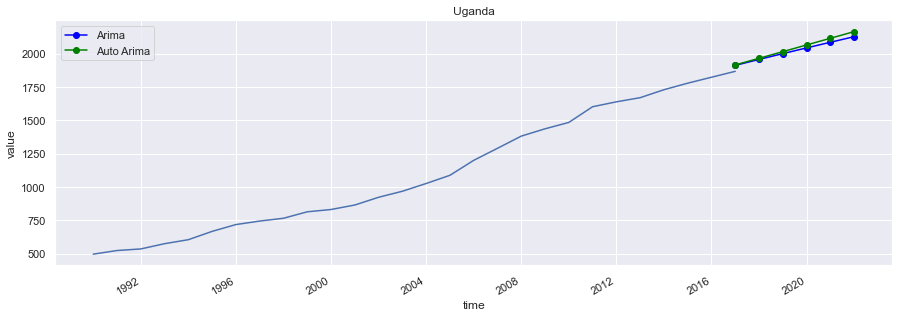

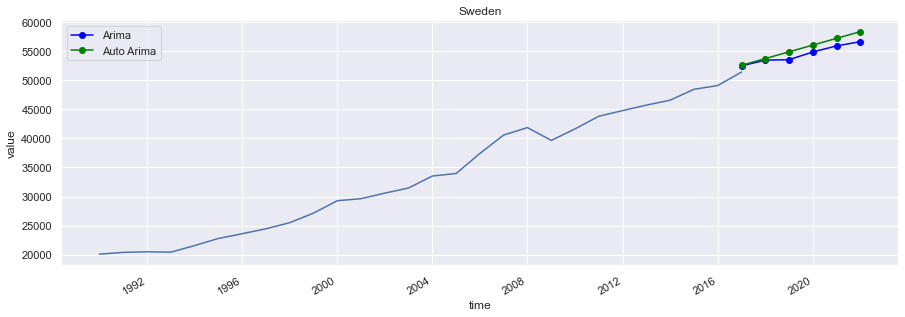

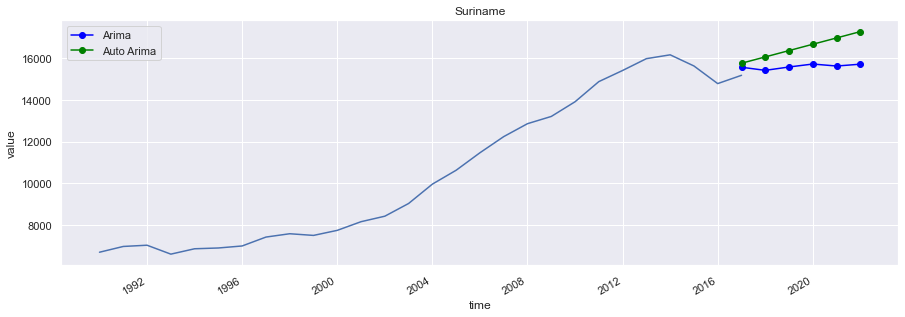

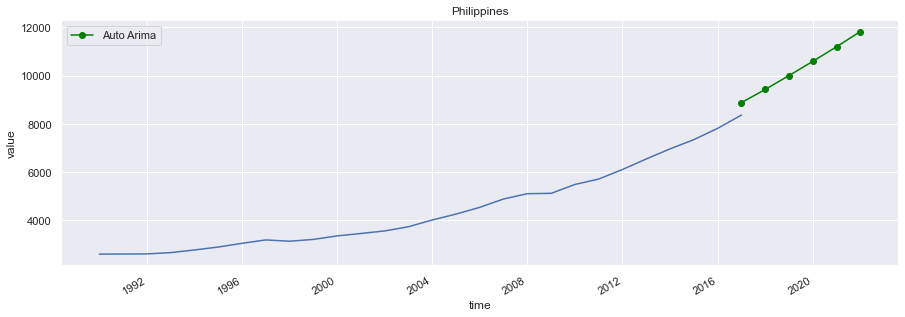

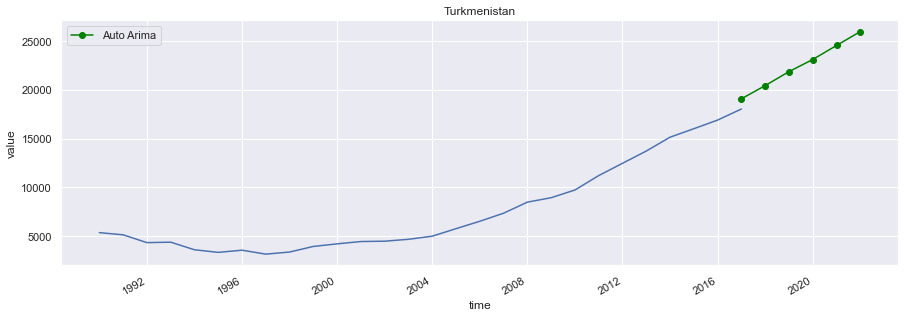

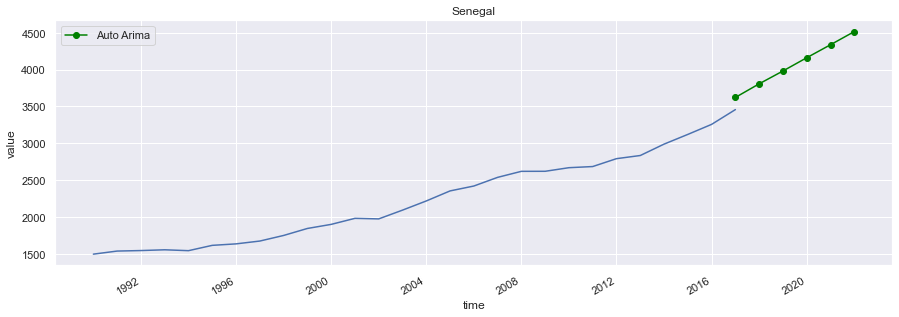

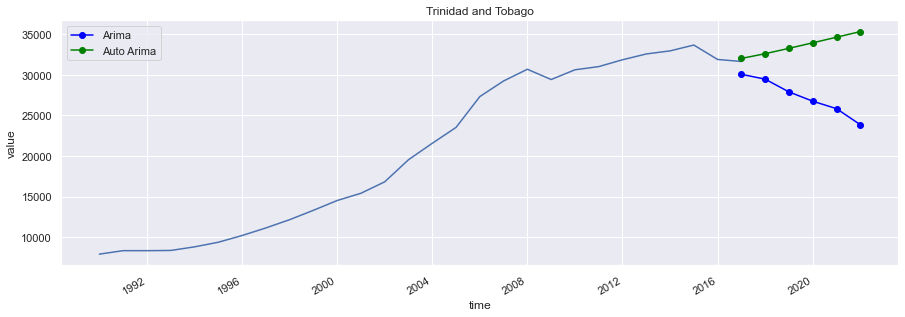

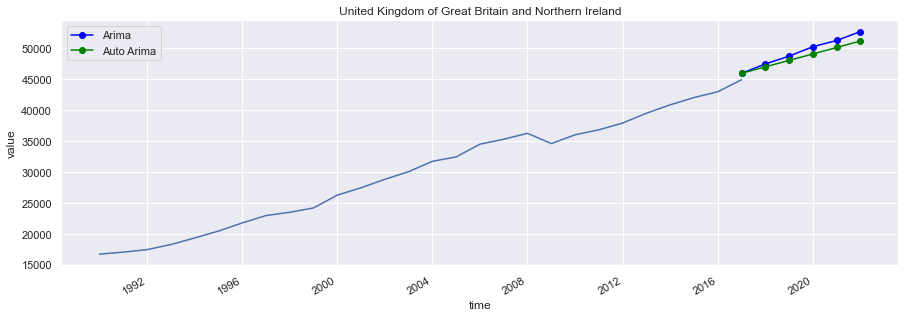

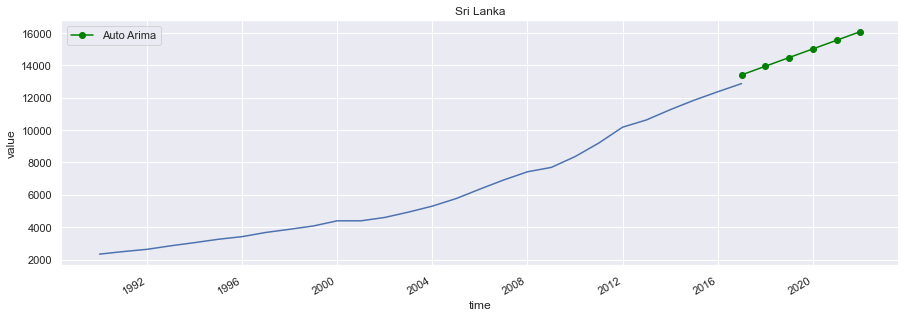

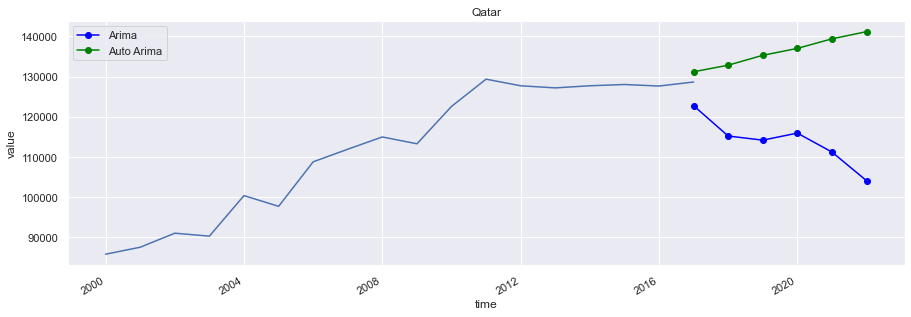

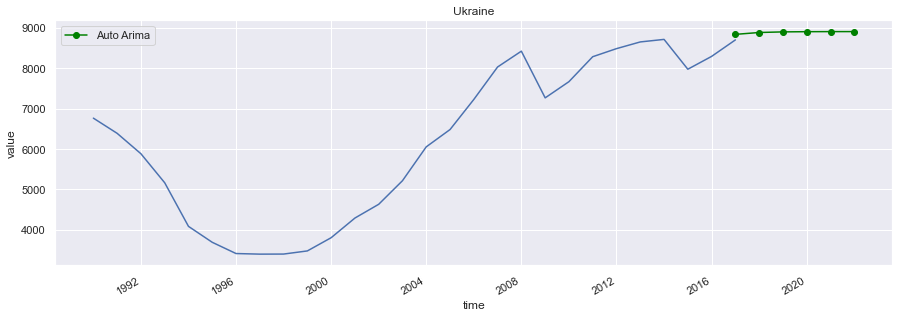

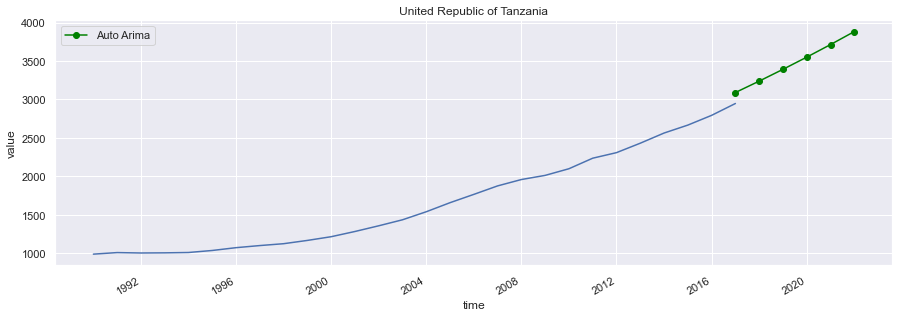

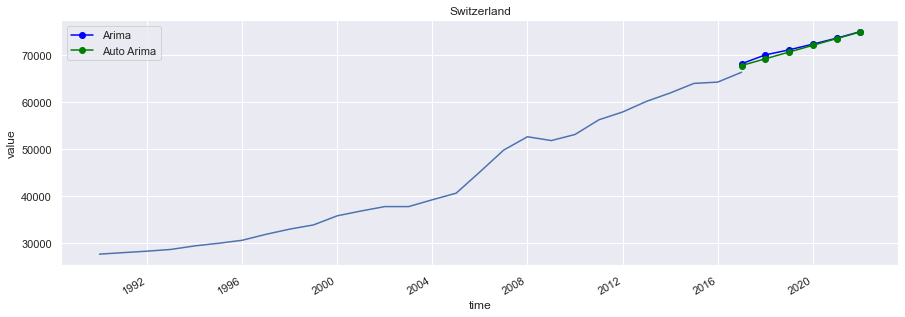

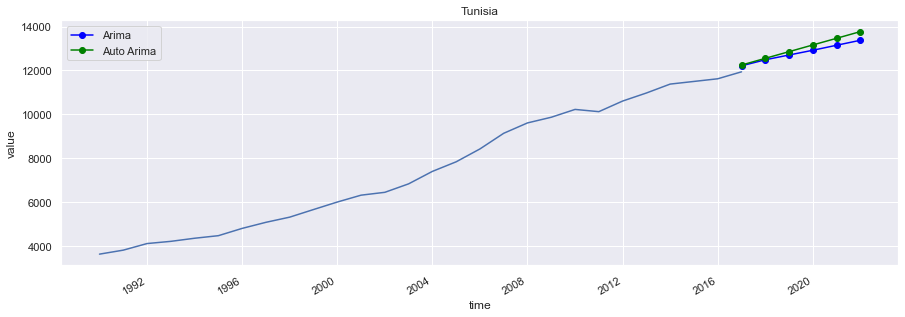

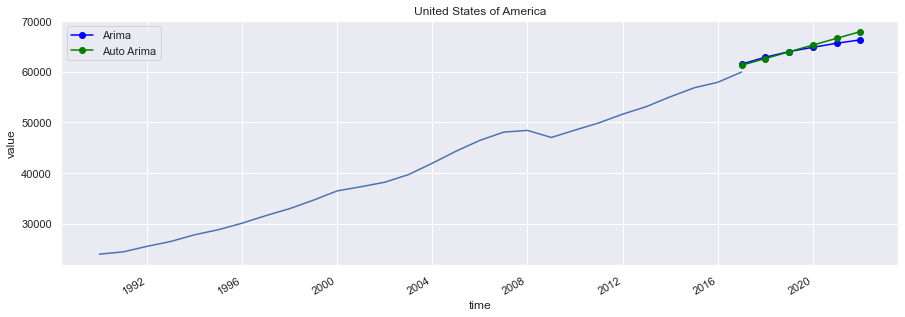

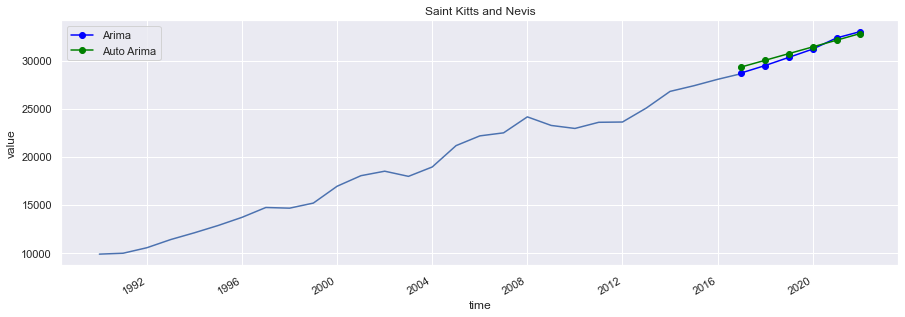

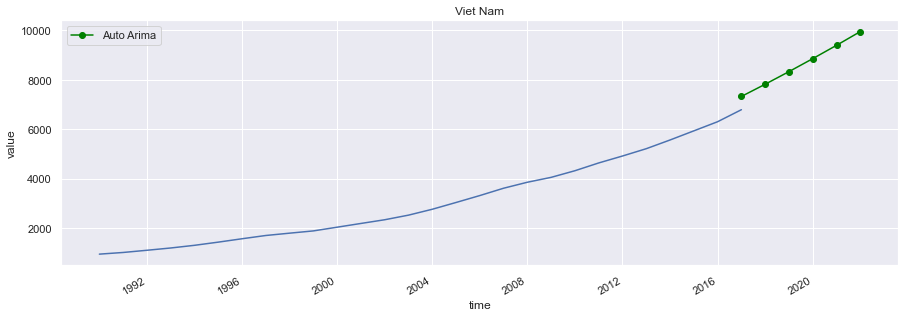

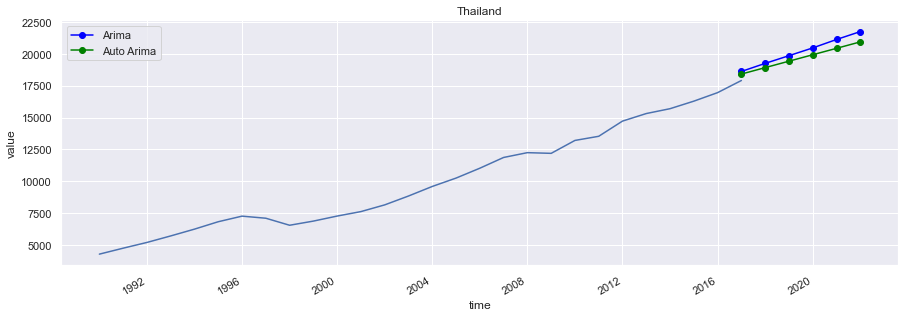

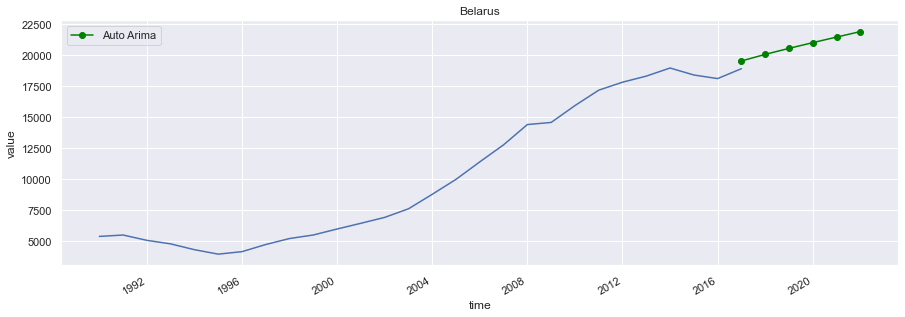

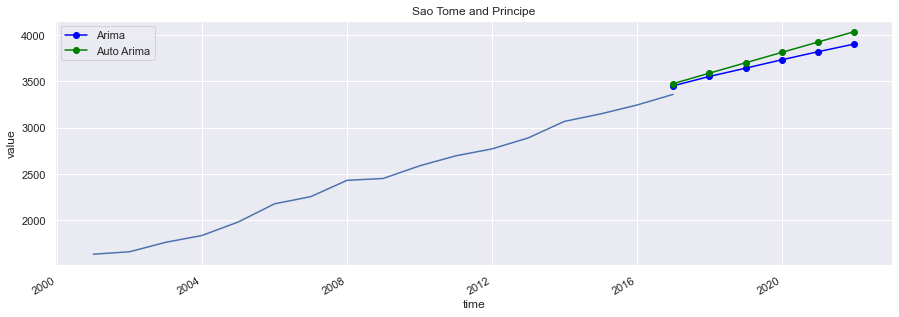

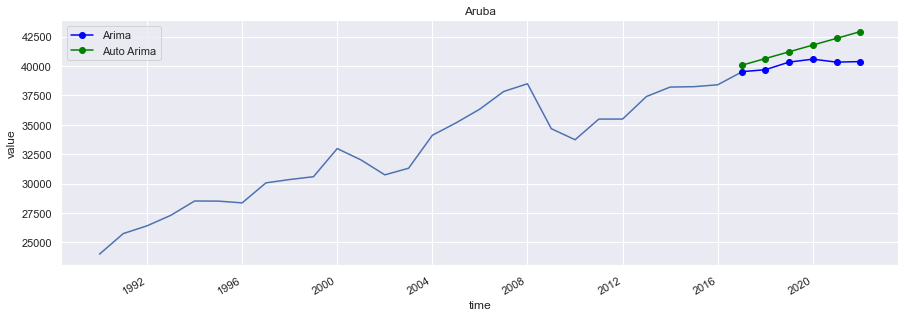

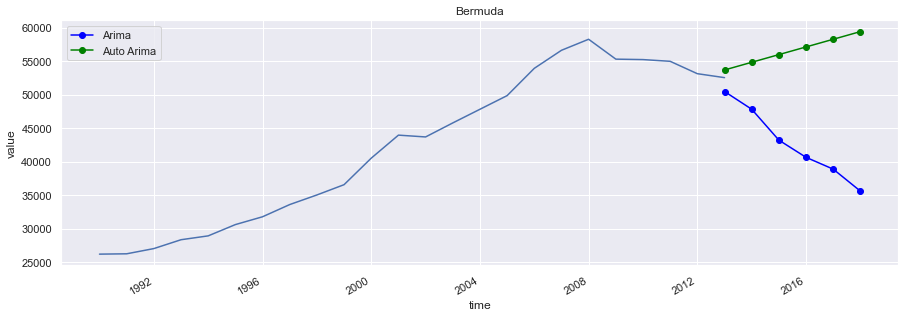

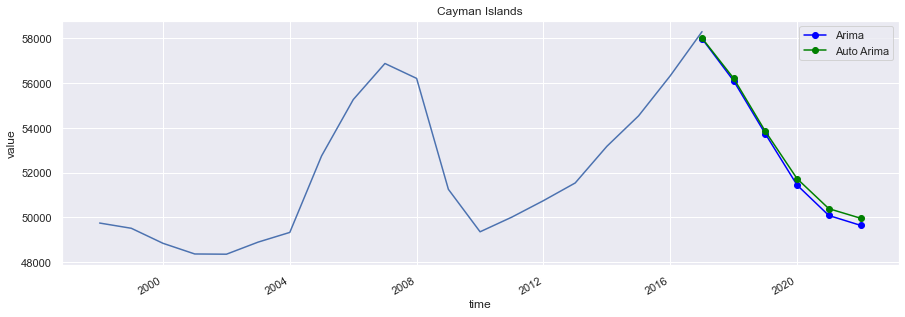

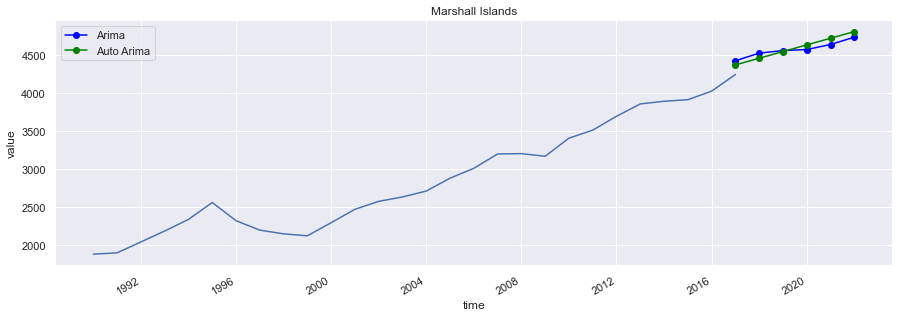

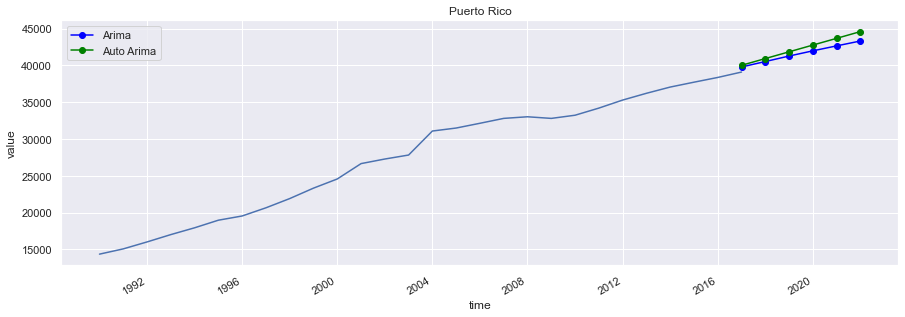

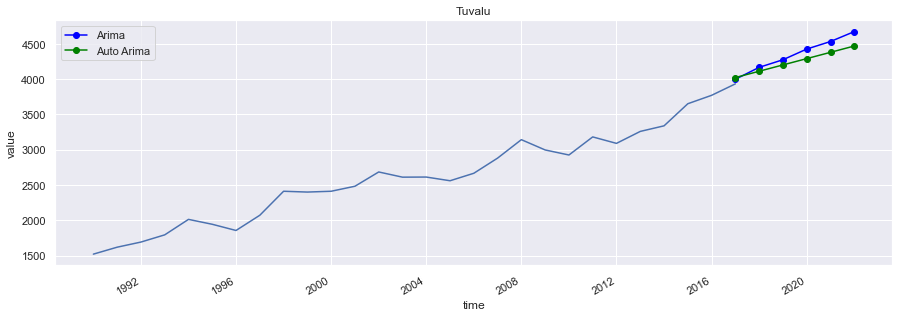

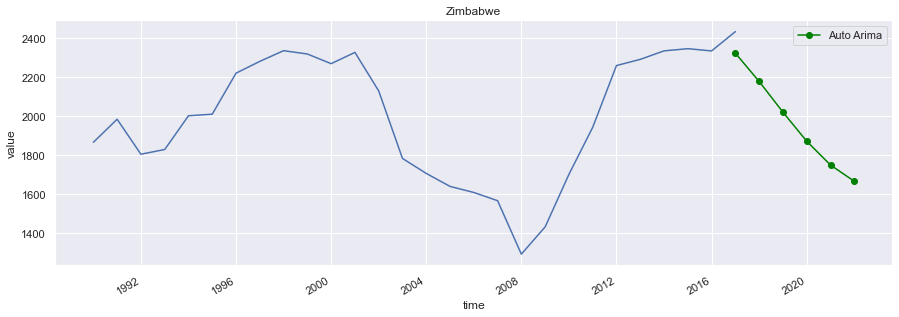

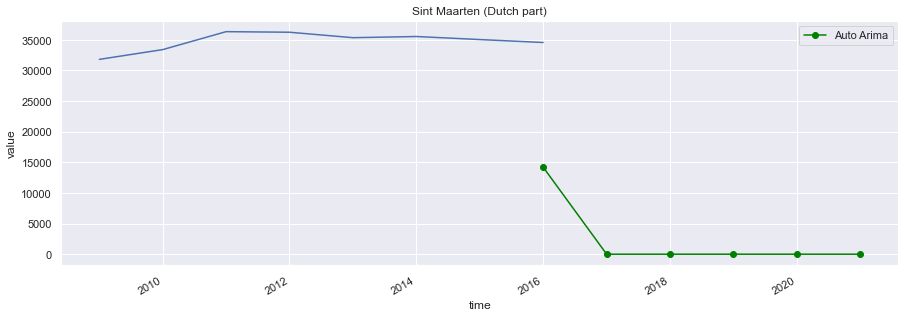

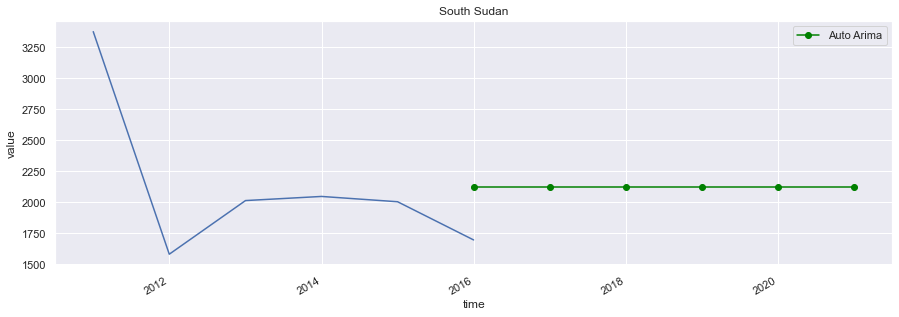

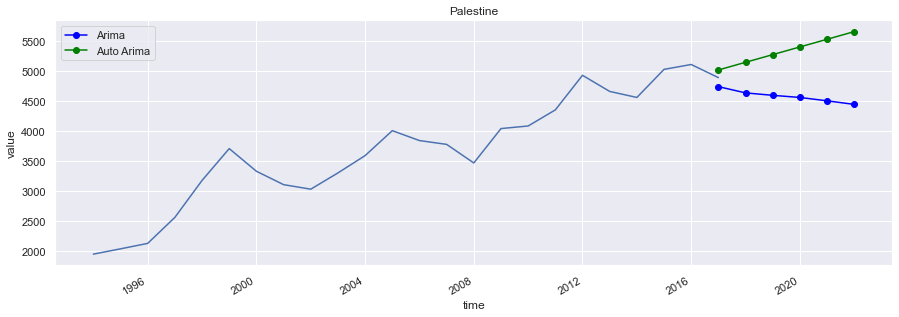

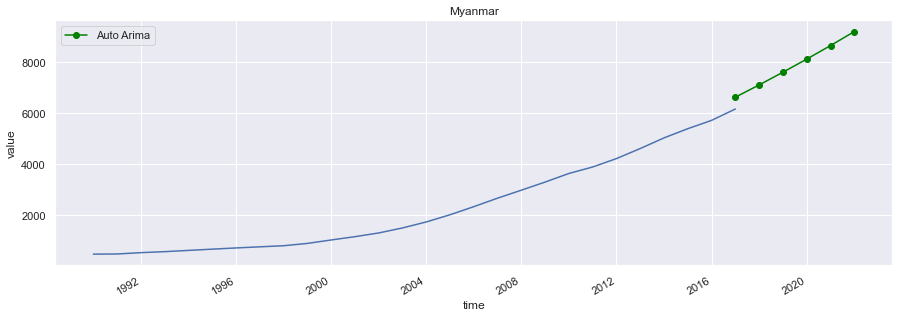

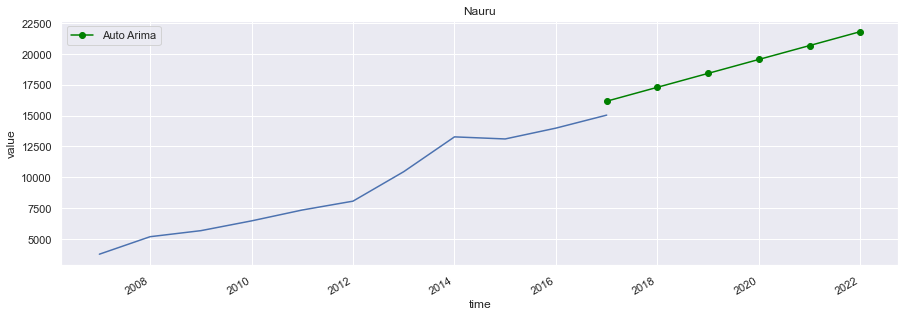

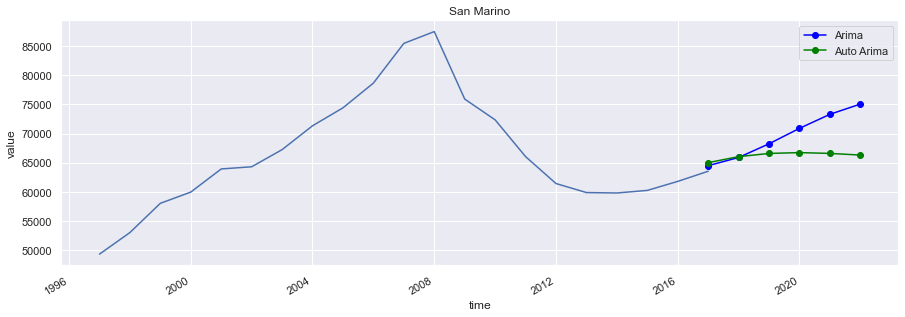

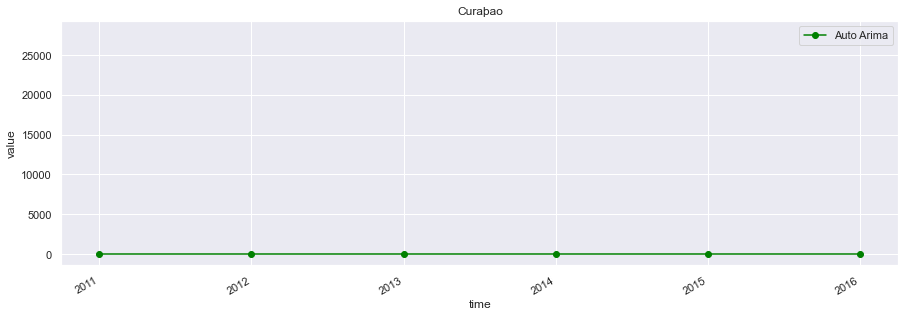

In [8]:
# Liniting the data to GDP per Capita
forecast_data = SQL_Query[SQL_Query['indicator'] == 'GDP per capita, PPP (current international $)']

# creating a country list
countries = forecast_data['country'].unique()

#countries = ['Australia']

# dropping gdp_pred
try:
    del gdp_pred
except:
    print("")

# running ARIMA per country
for c in countries:                      
    data = forecast_data[forecast_data['country'] == c]
    data['time'] = data['time'].astype(str) + '-01-01'
    data['time'] = pd.to_datetime(data['time'])
    print(c)
    
    data2 = data[['time', 'value']]
    
    #convert date column to datetime
    data2.set_index('time', inplace=True)
    
    # Setting the Index for 10 years
    index_5_years = pd.date_range(data2.index[-1], freq='AS', periods = 6) 
    
    # Dropping all tables
    try:
        del fcast1
        del fcast2
    except:
        print("")

    try:
        del df_fcast1
        del df_fcast2
    except:
        print("")
     
    try:        
        try:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(data2, order=(9,0,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            fcast1 = model_arima_fit.forecast(6)[0]
            # Passing the same index as the others
            fcast1 = pd.Series(fcast1, index=index_5_years)
            fcast1 = fcast1.rename("Arima") 
        except:
            # Running ARIMA on Best parameter
            model_arima = ARIMA(data2, order=(6,0,0))
            model_arima_fit = model_arima.fit(disp=-1)

            # Saving ARIMA predictions
            fcast1 = model_arima_fit.forecast(6)[0]
            # Passing the same index as the others
            fcast1 = pd.Series(fcast1, index=index_5_years)
            fcast1 = fcast1.rename("Arima") 
    except:
        print(c, "Arima Error")
        
    try:
        # Running auto ARIMA 
        auto_arima_model = pm.auto_arima(data2, seasonal=False, m=12)

        # make your forecasts
        fcast2 = auto_arima_model.predict(6) 
        fcast2 = pd.Series(fcast2, index=index_5_years)
        fcast2 = fcast2.rename("Auto Arima")

    except:
        print(c, "Auto Arima Error")  

    # Ploting the predictions
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(x='time', y='value', data = data)
    chart.set_title(c)
    #chart = ml_data2.plot(ax=ax, color = 'black')
    try:
        fcast1.plot(ax=ax, color='blue', marker="o", legend=True)
    except:
        print("")
        
    try:
        fcast2.plot(ax=ax, color='green', marker="o", legend=True)
    except:
        print("")
        
    # Creating a df index
    index_5_years_df = pd.DataFrame(index_5_years, columns=['ForecastYear'])   
    
    try:
        # Creating a DF for fcast1
        fcast1.reset_index(drop=True, inplace=True)
        df_fcast1 = pd.DataFrame(fcast1)
        df_fcast1.columns = df_fcast1.columns.str.replace('Arima','ForecastValue')
        
        # Joining them together
        df_fcast1 = pd.concat([index_5_years_df, df_fcast1], axis=1)
        df_fcast1['Country'] = c
        df_fcast1['ML Method'] = 'Arima'
    except:
        df_fcast1 = pd.DataFrame({'ForecastYear': [np.nan], 'ForecastValue': [np.nan], 'Country':[c], 'ML Method':['Arima']})

    try:
        fcast2.reset_index(drop=True, inplace=True)
        df_fcast2 = pd.DataFrame(fcast2)
        df_fcast2.columns = df_fcast2.columns.str.replace('Auto Arima','ForecastValue') 
        
        # Joining them together
        df_fcast2 = pd.concat([index_5_years_df, df_fcast2], axis=1)
        df_fcast2['Country'] = c
        df_fcast2['ML Method'] = 'Auto - Arima'
        
    except:
        df_fcast2 = pd.DataFrame({'ForecastYear': [np.nan], 'ForecastValue': [np.nan], 'Country':[c], 'ML Method':['Auto - Arima']})
        
    df_fcast = pd.concat([df_fcast1, df_fcast2], ignore_index = True )
    
    # Saving the predictions in a DF
    try:
        gdp_pred = pd.concat([gdp_pred, df_fcast], ignore_index = True )
    except:
        gdp_pred = df_fcast

In [9]:
gdp_pred.head()

ForecastYear  ForecastValue    Country     ML Method
0          NaT            NaN  Australia         Arima
1   2017-01-01   50431.032681  Australia  Auto - Arima
2   2018-01-01   51665.762118  Australia  Auto - Arima
3   2019-01-01   52900.491555  Australia  Auto - Arima
4   2020-01-01   54135.220991  Australia  Auto - Arima

In [10]:
# Creating a copy
SQL_Query2 = SQL_Query.copy()
gdp_pred2 = gdp_pred.copy()

SQL_Query2['time'] = SQL_Query2['time'].astype(str) + '-01-01'
SQL_Query2['time'] = pd.to_datetime(SQL_Query2['time'])

SQL_Query2['ML Method'] = np.nan
SQL_Query2['ForecastValue'] = 0

gdp_pred2['indicator'] = 'GDP per capita, PPP (current international $)'
gdp_pred2['demo_ind'] = np.nan
gdp_pred2['location'] = np.nan
gdp_pred2['value'] = np.nan
gdp_pred2['flag codes'] = np.nan
gdp_pred2['flags'] = np.nan

gdp_pred2 = gdp_pred2[['demo_ind','indicator','location','Country','ForecastYear','value','flag codes','flags','ML Method','ForecastValue']]
gdp_pred2.columns = ['demo_ind','indicator','location','country','time','value','flag codes','flags','ML Method','ForecastValue']
SQL_Query2 = SQL_Query2[['demo_ind','indicator','location','country','time','value','flag codes','flags','ML Method','ForecastValue']]


# concat
combined_gdp = pd.concat([SQL_Query2, gdp_pred2], ignore_index = True )

combined_gdp.head()

demo_ind                                 indicator location  \
0  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   
1  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   
2  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   
3  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   
4  SP_DYN_TFRT_IN  Fertility rate, total (births per woman)      AUS   

     country       time  value flag codes flags ML Method  ForecastValue  
0  Australia 1970-01-01   2.86       None  None       NaN            0.0  
1  Australia 1971-01-01   2.96       None  None       NaN            0.0  
2  Australia 1972-01-01   2.74       None  None       NaN            0.0  
3  Australia 1973-01-01   2.49       None  None       NaN            0.0  
4  Australia 1974-01-01   2.40       None  None       NaN            0.0

### 4. Exporting/Writing data back to SQL

In [13]:
# Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib


quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-8L98FK0\MSSQLSERVER09;"
                     "Database=Data360YP;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

combined_gdp.to_sql('GDP_Forecast_Output', schema='dbo', con = engine, if_exists = 'replace')
